### Docker Compose Part 2


> docker compose up --build

If you do any change then you will have run above command again and again

##### Change in Docker Compose File -- Dont add web service 

> docker compose up -d 

Both postgres-db and redis-db service will be seen in docker-ps .

Our Web application will run differently 
> docker compose up --build
If you do any change then you will have run above command again and again

##### Change in Docker Compose File -- Dont add web service 

> docker compose up -d 

Both postgres-db and redis-db service will be seen in docker-ps .

Our Web application will run differently 


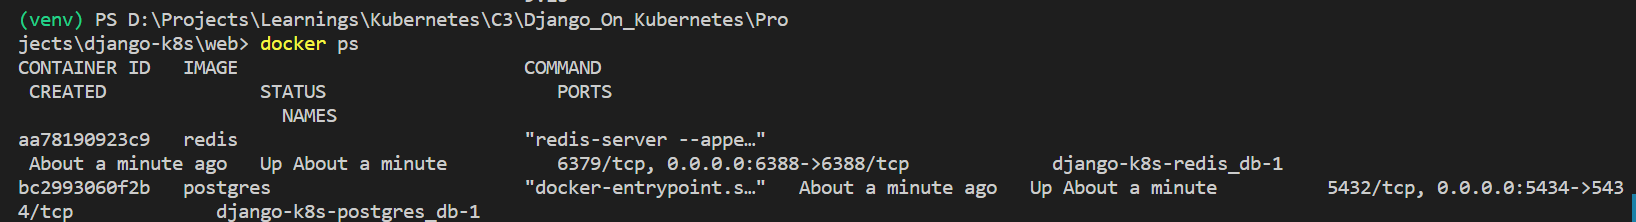

Here you can see that local host port is also mapped here . 0.0.0.0:6388/tcp.

So any django project or python project which has access to postrgres can access this port . So basically it refers to localhost 

It is because of below line in DockerCompose 

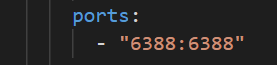

So if you remove above line from dockercompose . 0.0.0.0 will not be written

So we will also change HOST in .env File .

from postgres_db to localhost

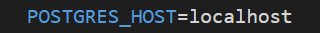

Up and Checking connectivity 

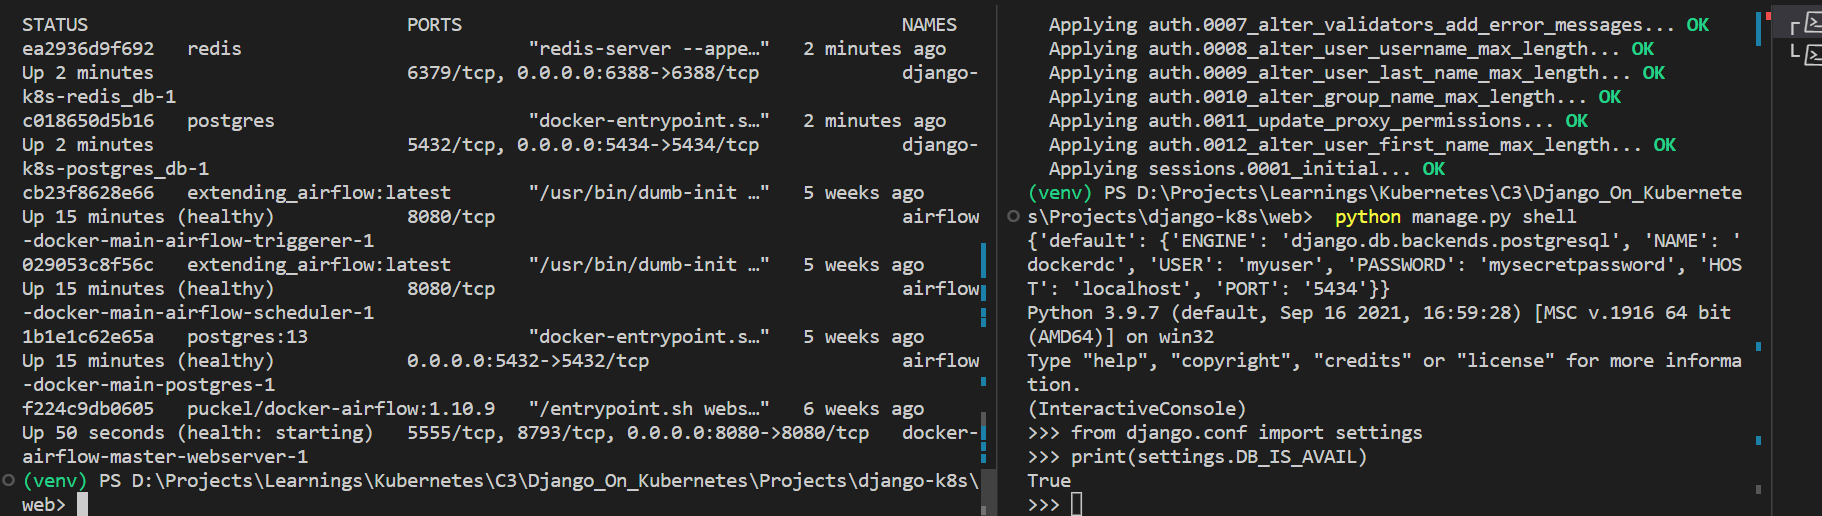

When Docker Compose is down - python manage.py migrate wont work

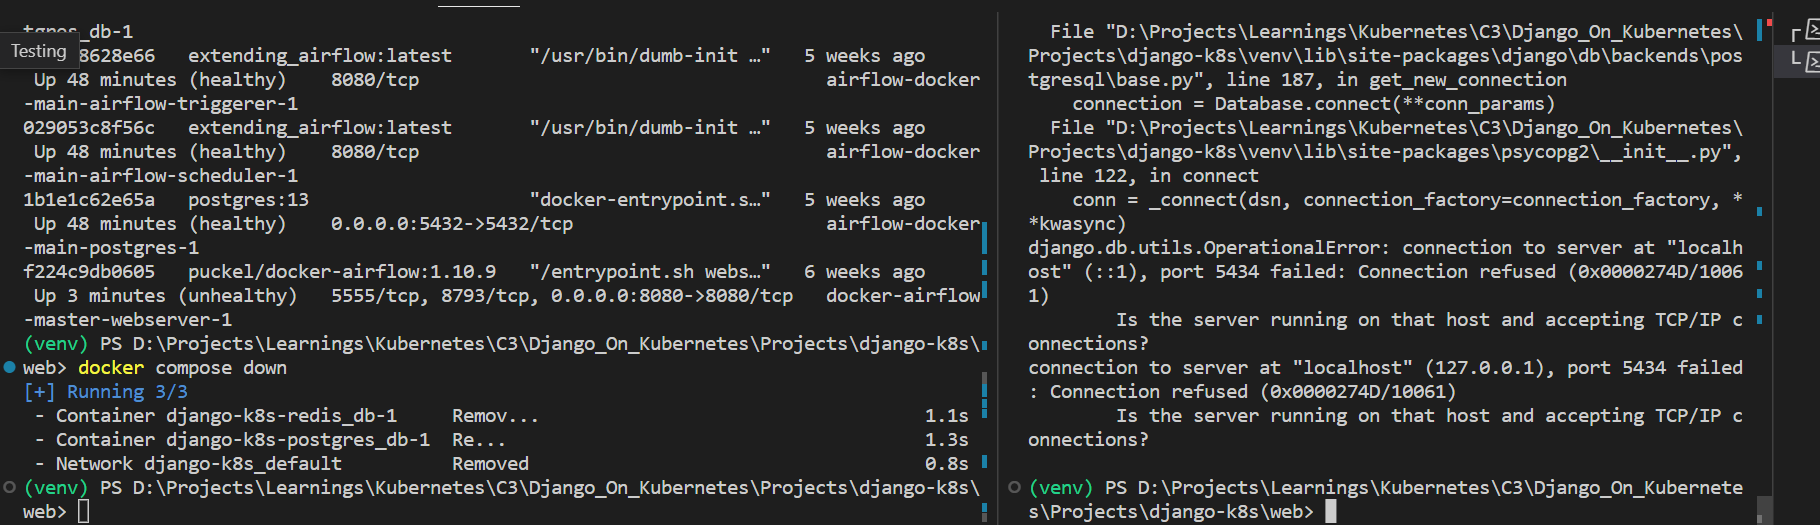

Make sure python manage.py runserver is running

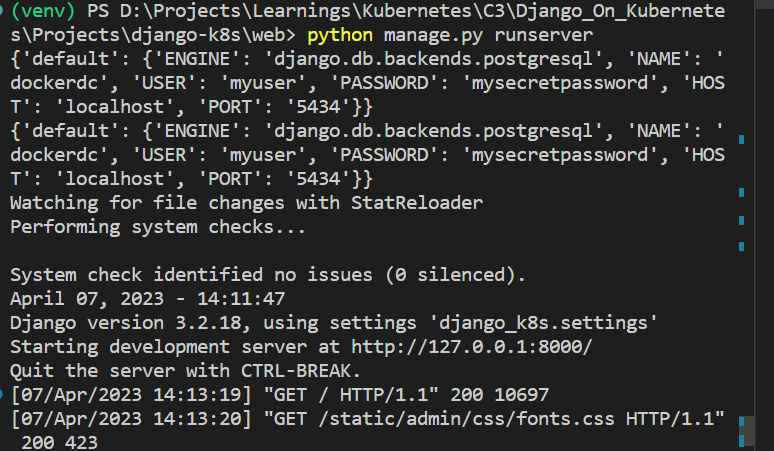

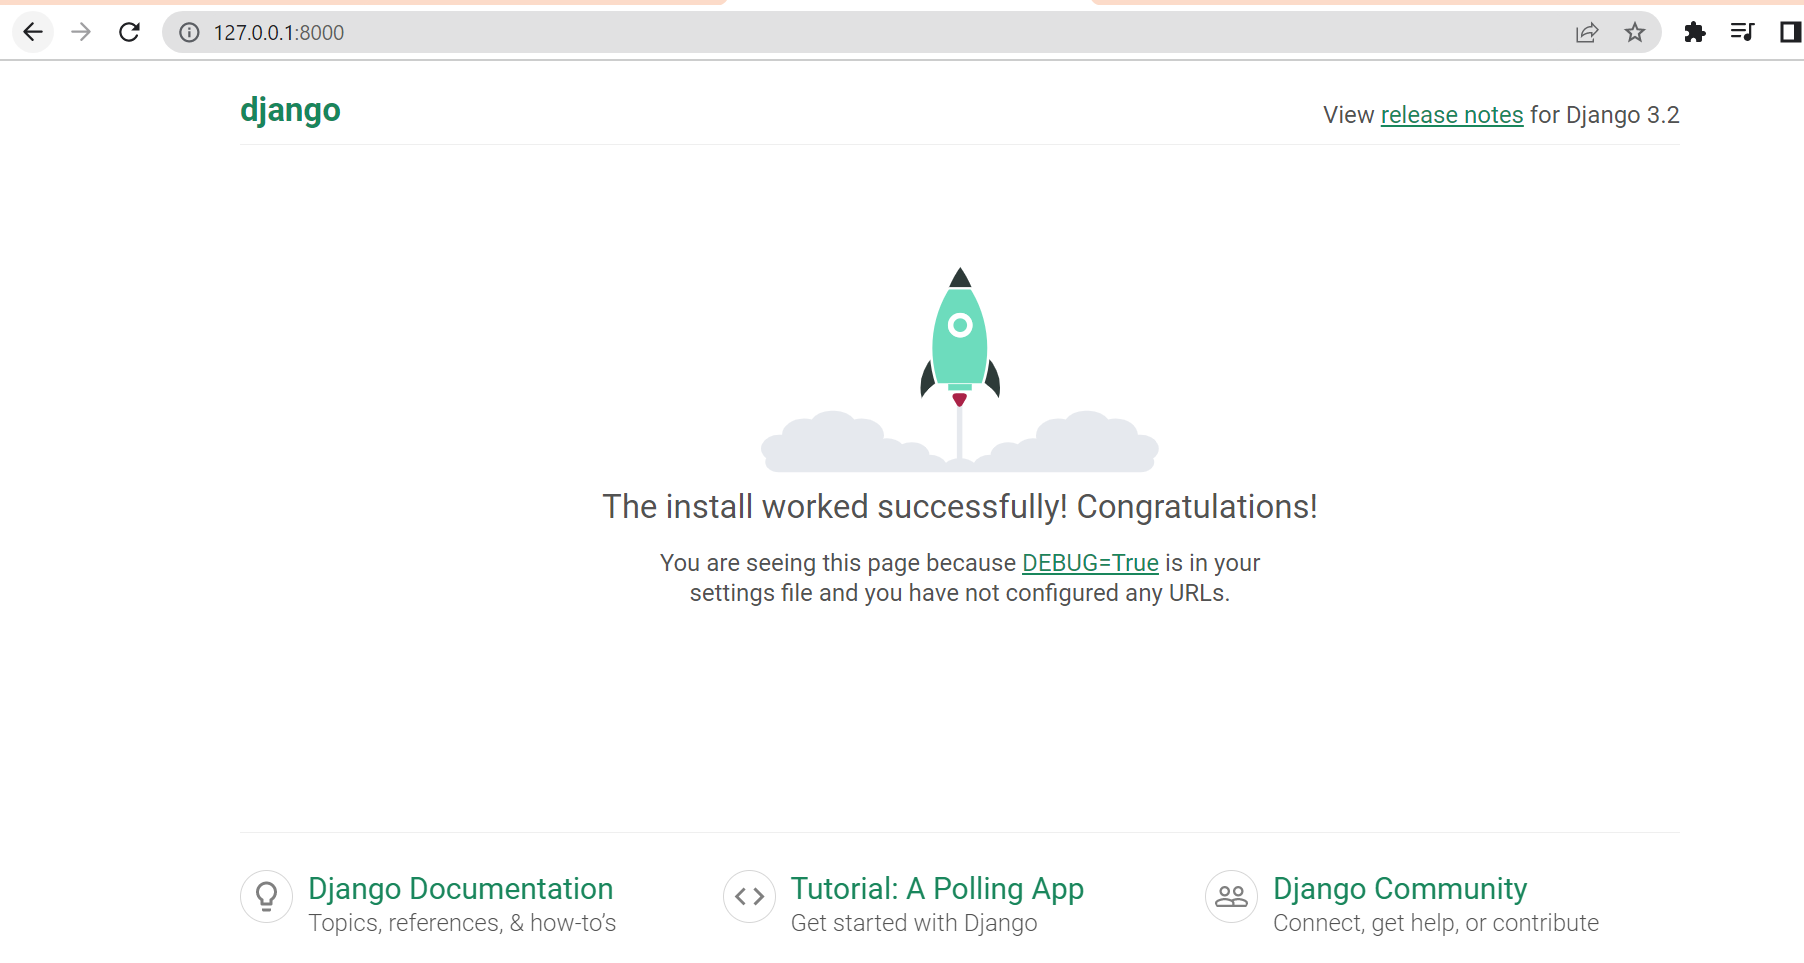

When docker compose is down . Postgres db wont work . And we wont be able to login

##### if you want to login .

Then keep docker compose up

> python manage.py createsuperuser

That password should be use for login in 127.0.0.1:8000/admin

### Provision kubernetes on Digital Ocean 

- Create Free Trial Account 
- Navigation - Kubernetes - Create Kubernetes Cluster 
- Choose Datacentre Region - Banglore 

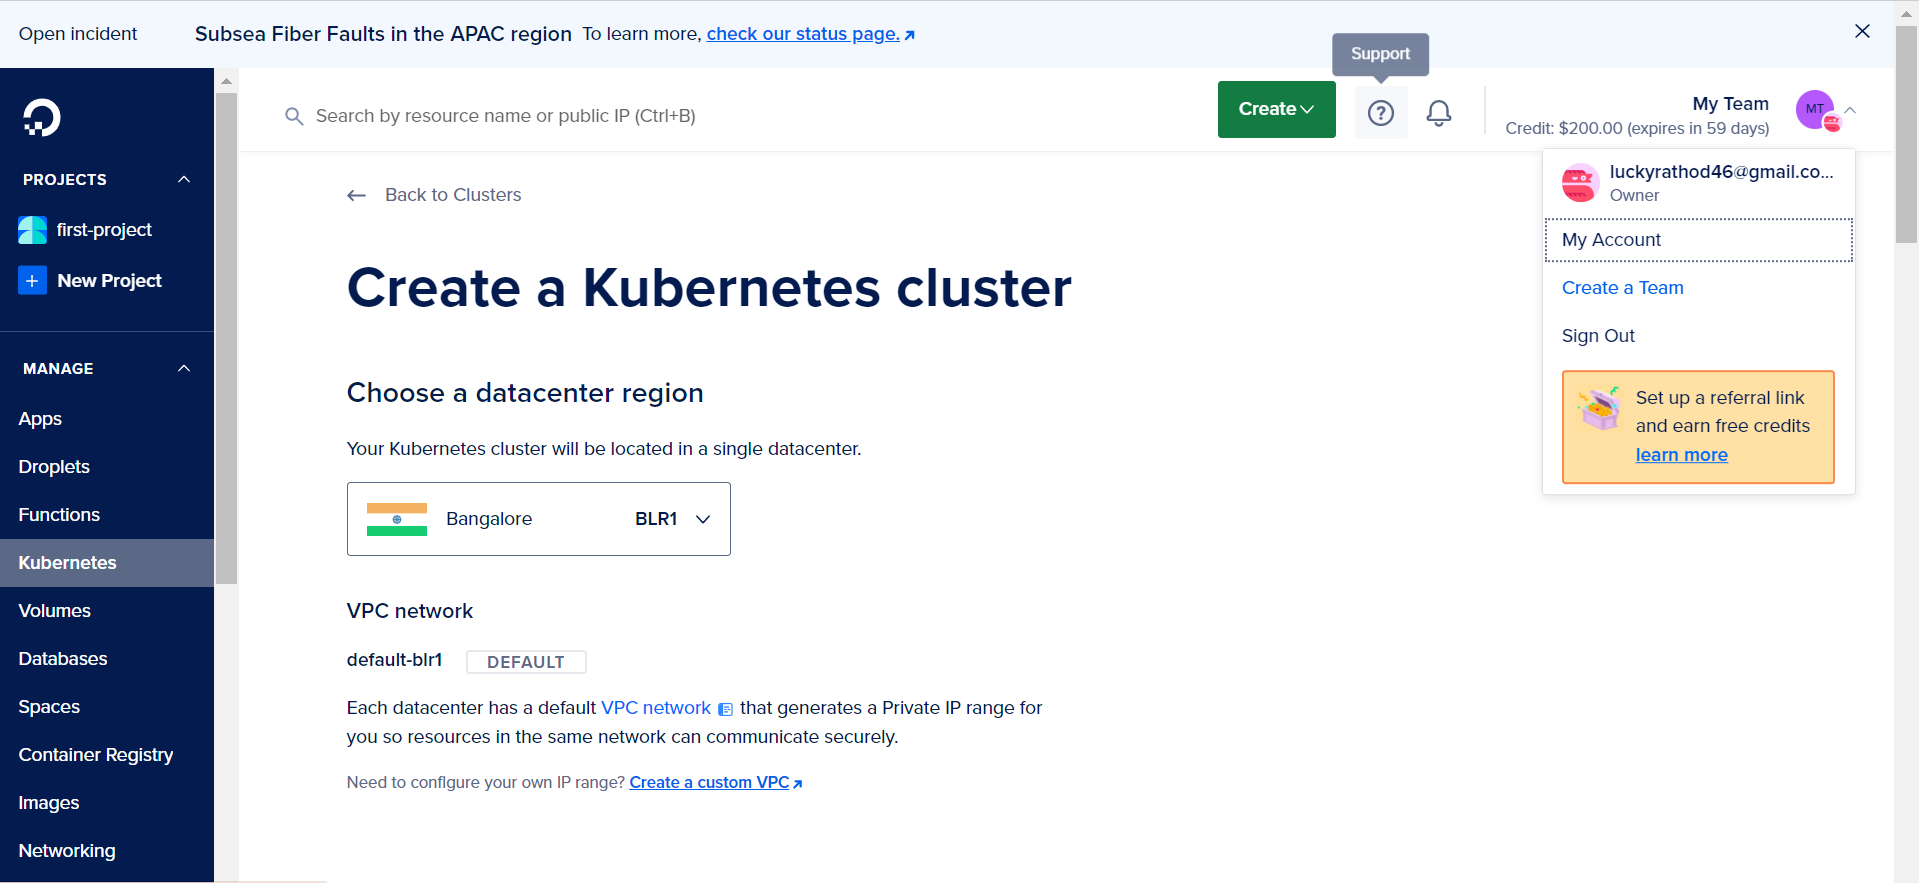

VPV Network 


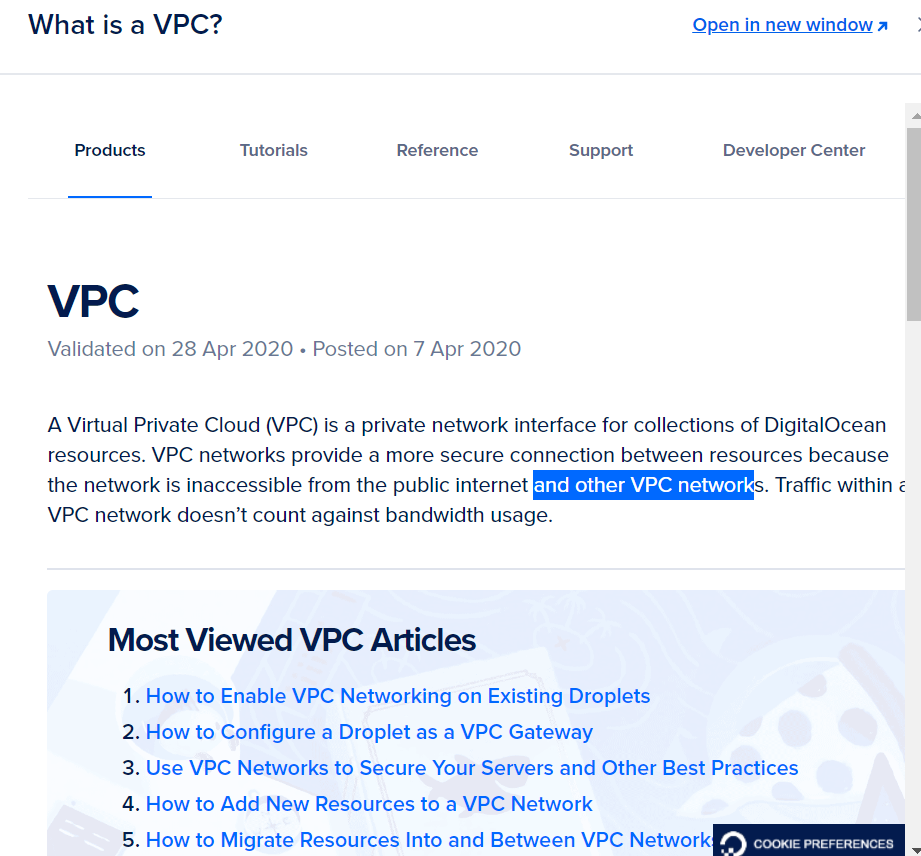

Node Pool
- It is a collection of Nodes 

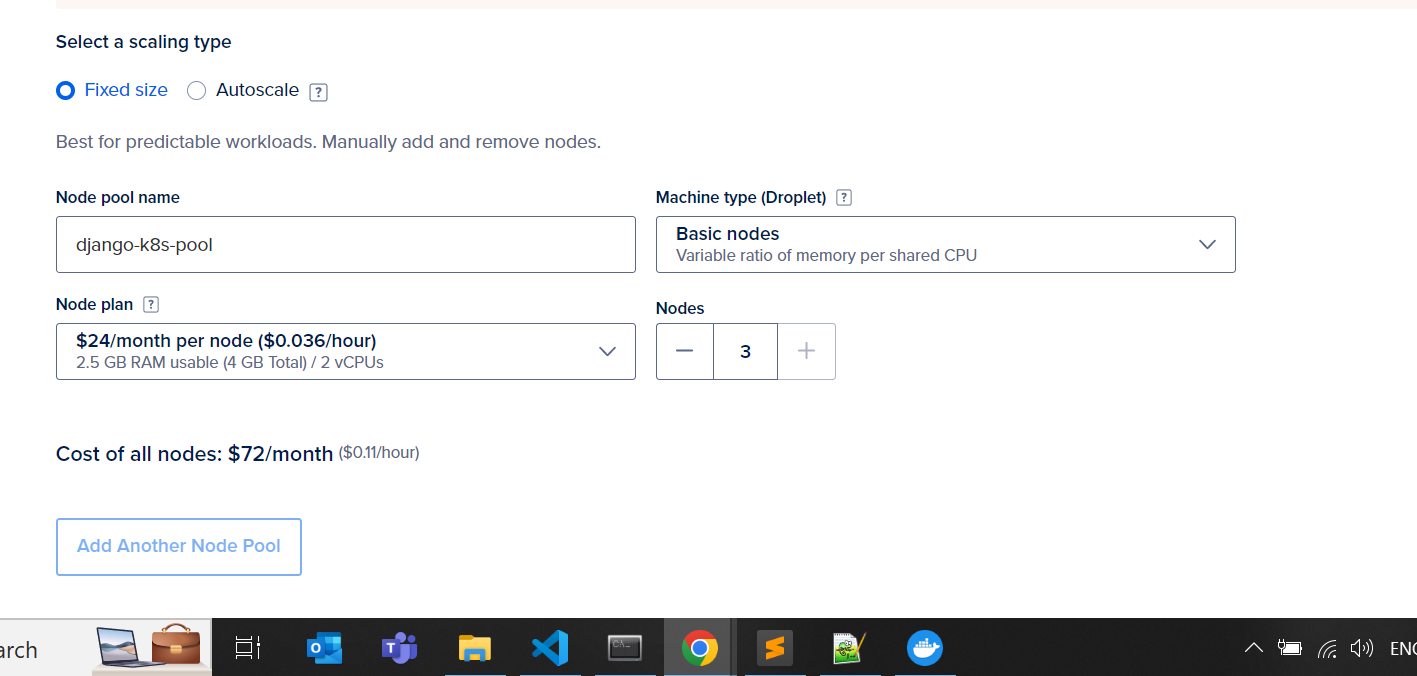

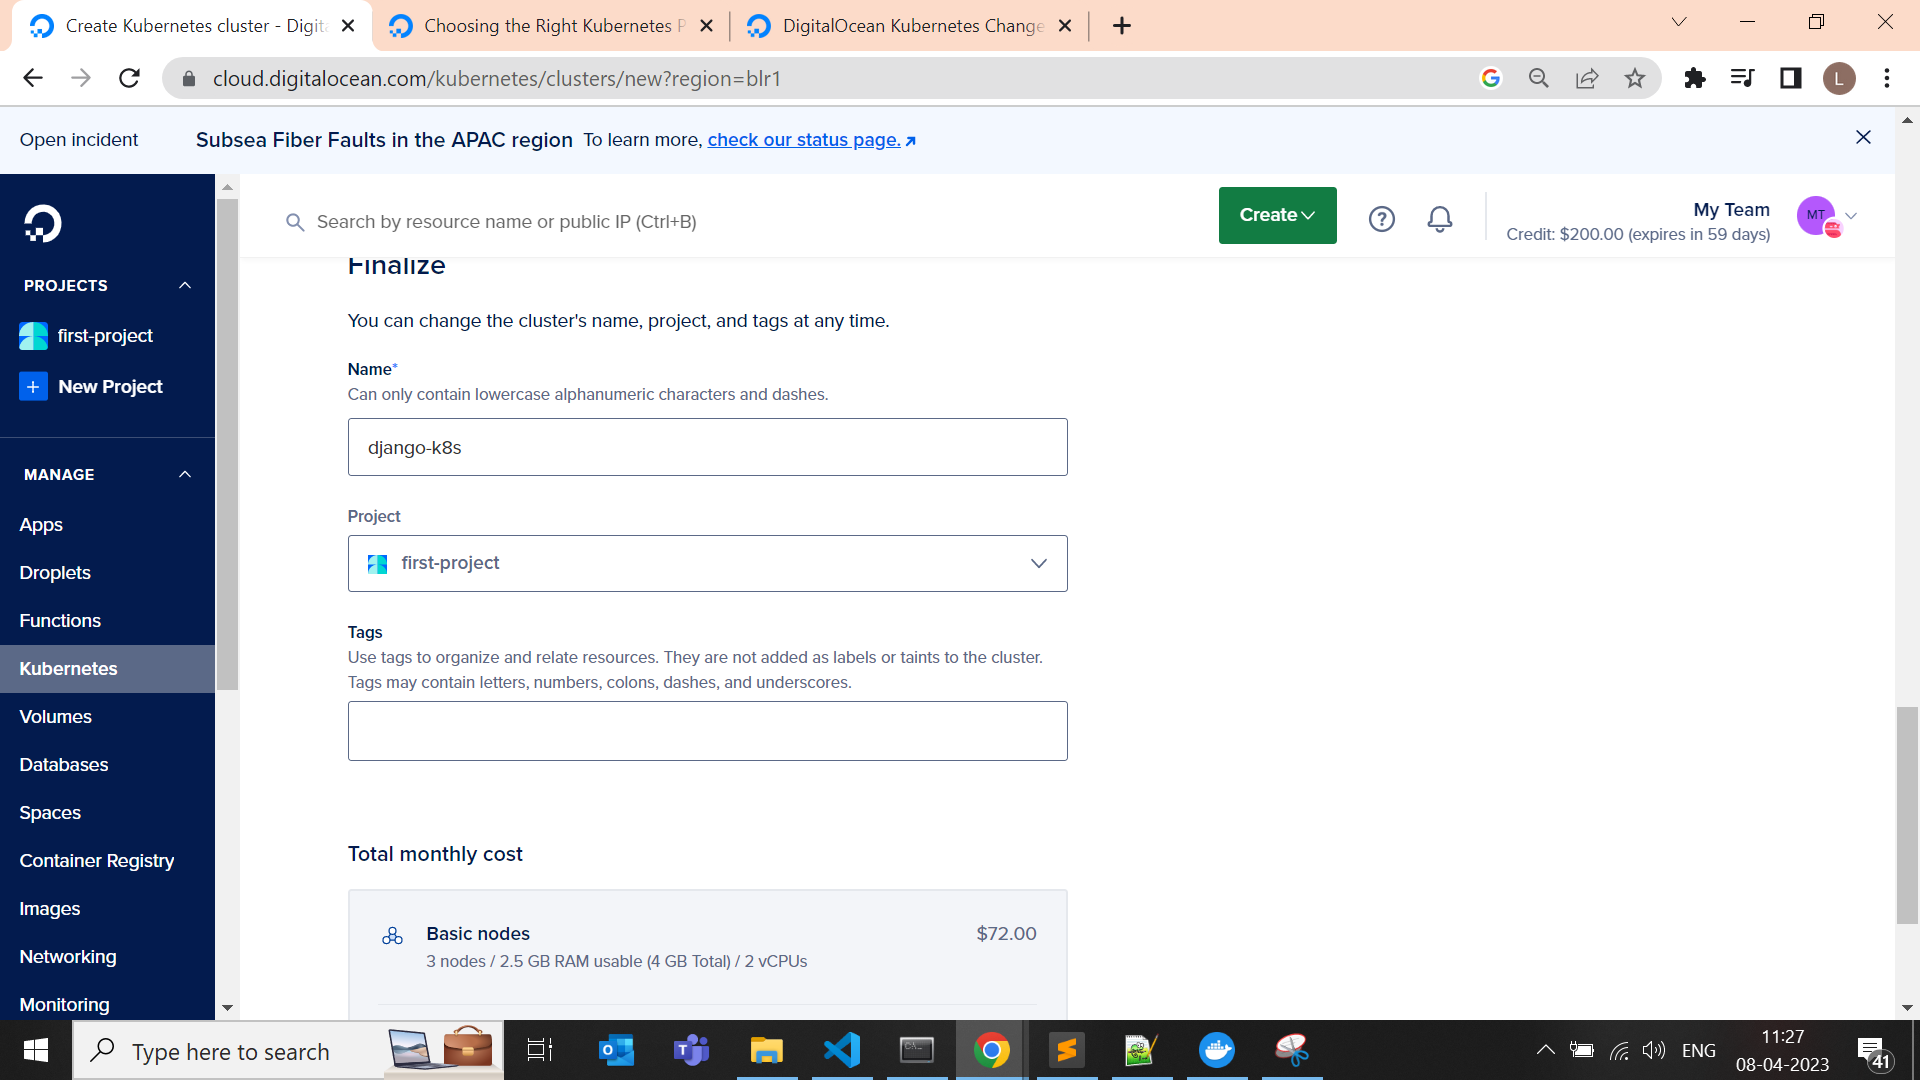

Once you click on Create Cluster - It will create multiple droplets.i-e Having Multiple Virtual machine.

We have setup Node count as 3 . It is similar to having 3 different Computers running on same cluster with kubernetes 

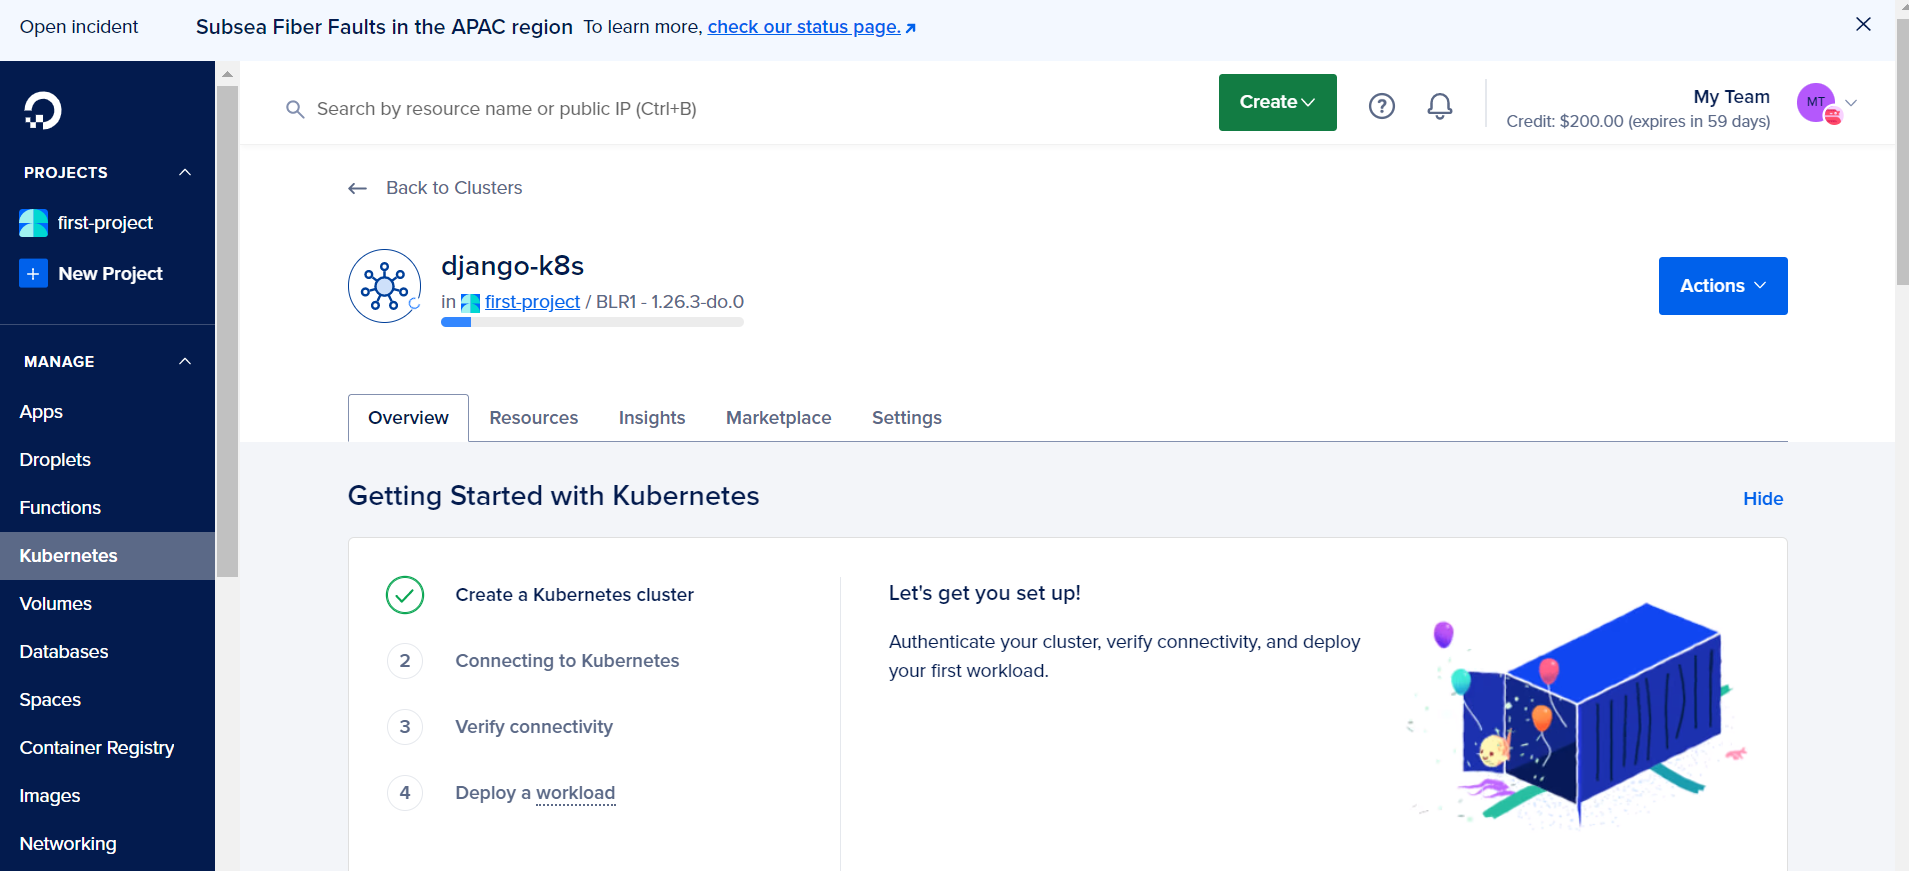

Go to Resources Tab - You will see three Nodes are running 

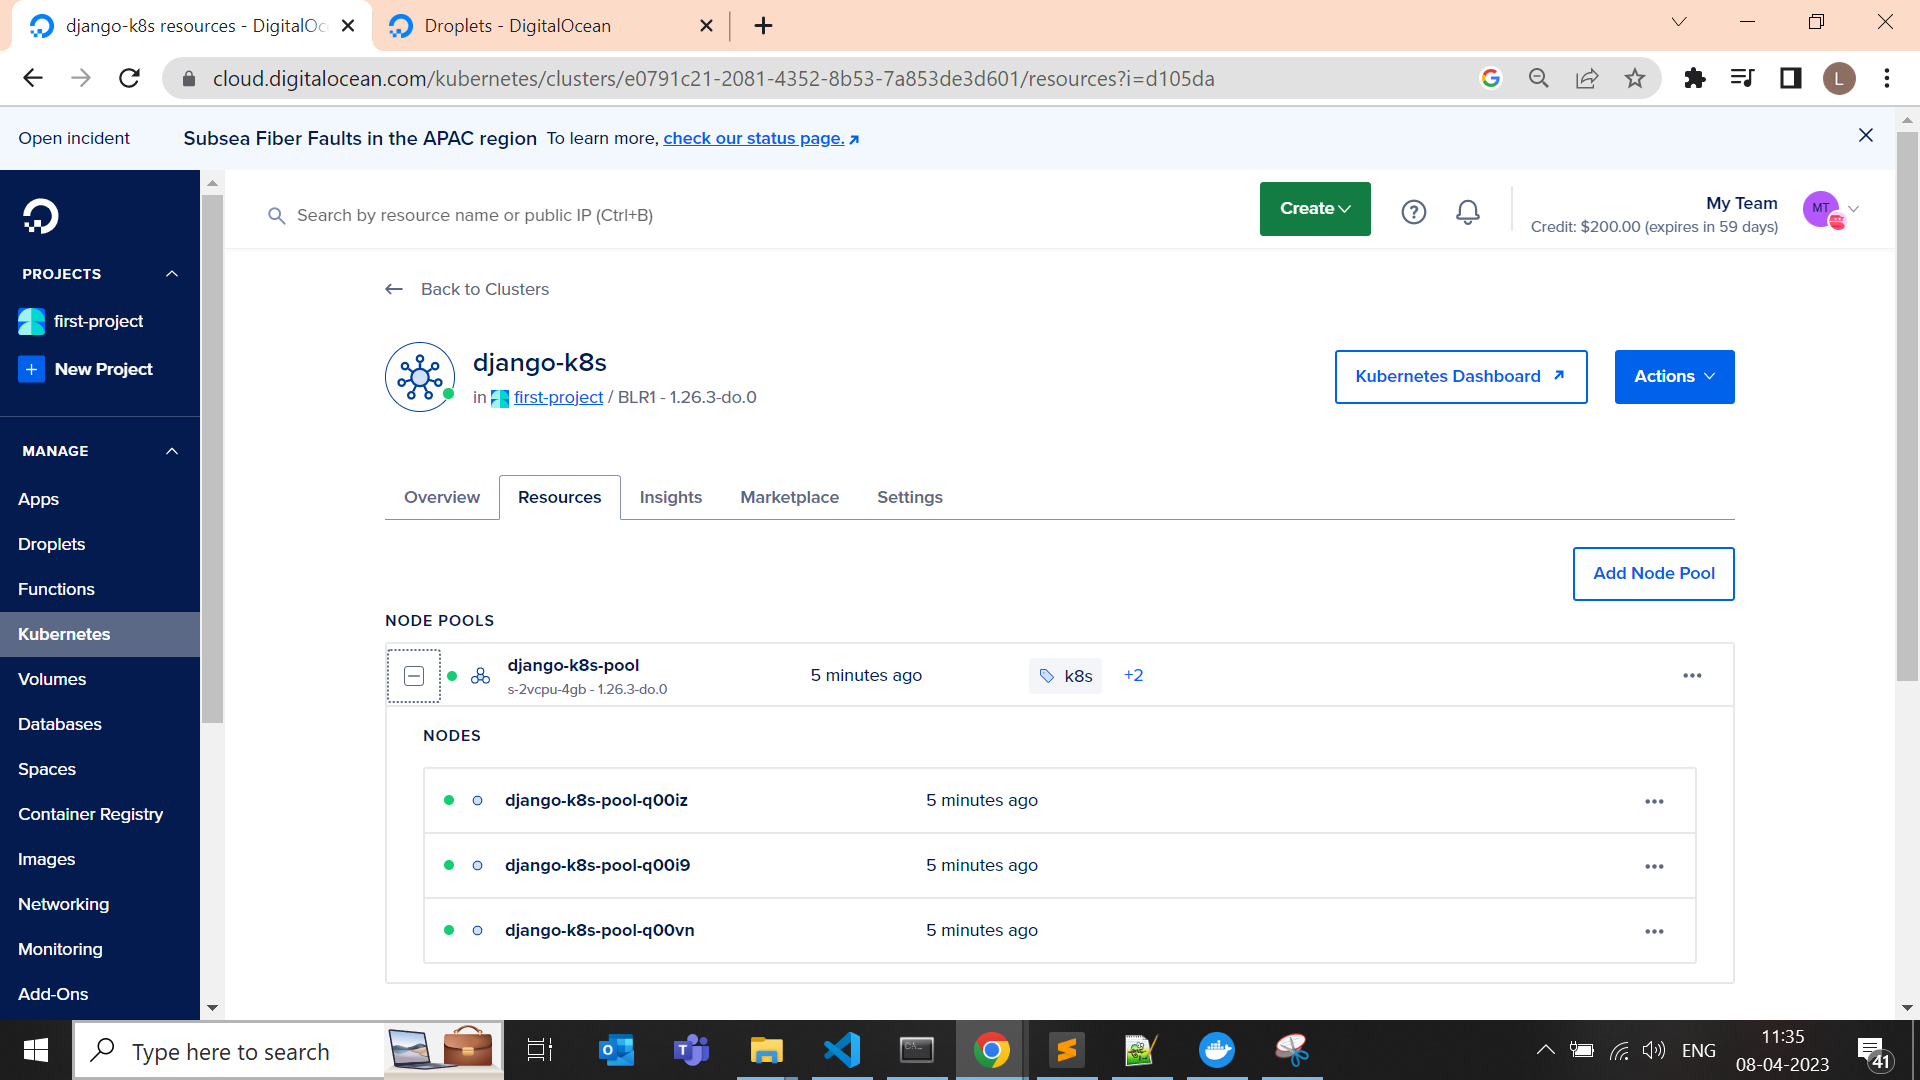

##### Go in Droplets Section

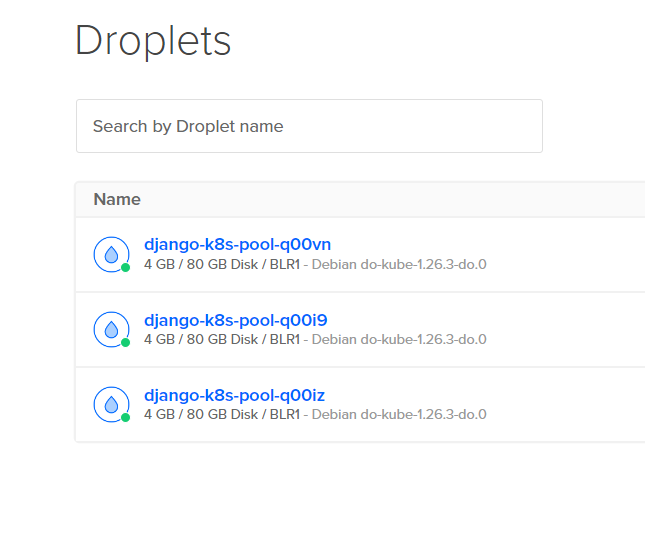

Kubernetes Cluster is nothing but cluster of Virtual Machines (Droplets).
All services will be managed by docker container 

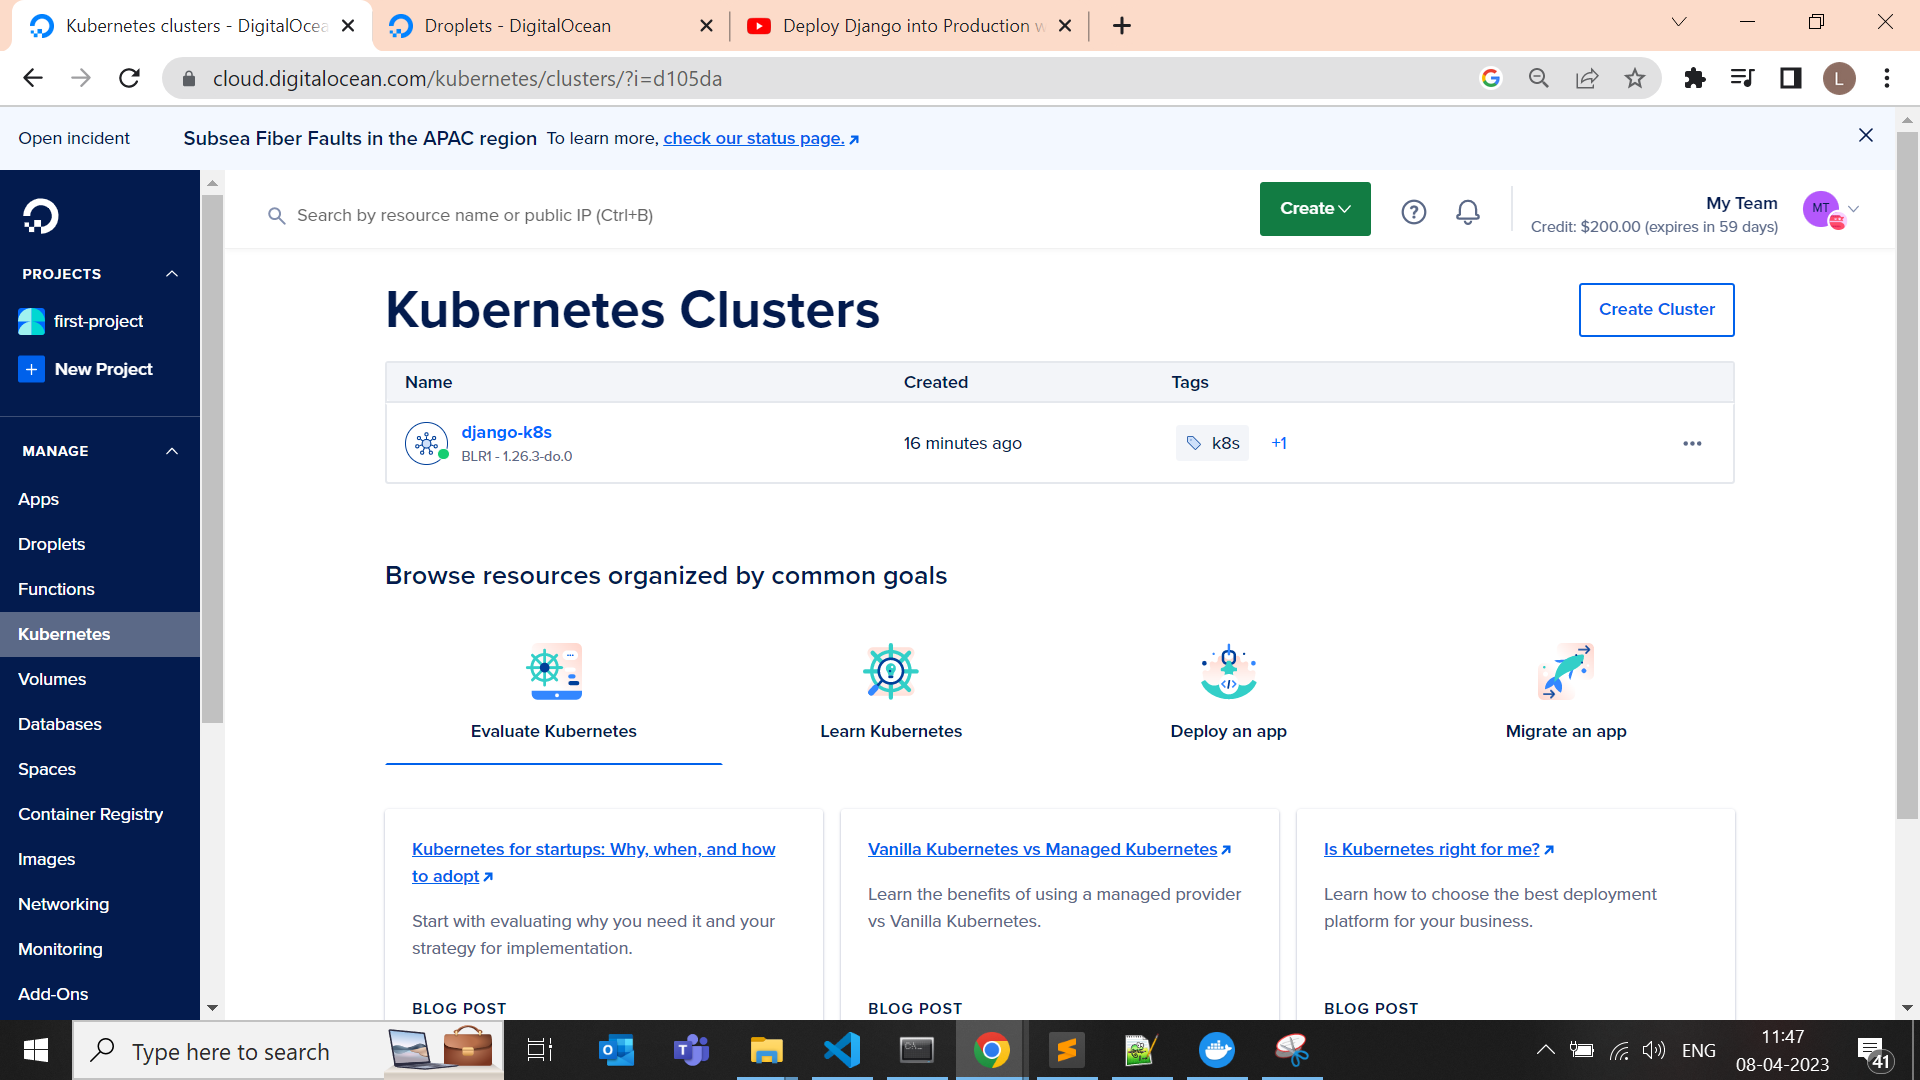

### Connect to Kubernetes with Kubectl and Kubeconfig

##### Download the ConfigFile from Actions Tab . This ConfigFile will be used by KUBECTL to connect to that cluster 

Install Chocolatey 

> Set-ExecutionPolicy Bypass -Scope Process -Force; [System.Net.ServicePointManager]::SecurityProtocol = [System.Net.ServicePointManager]::SecurityProtocol -bor 3072; iex ((New-Object System.Net.WebClient).DownloadString('https://community.chocolatey.org/install.ps1'))

Install kubectl

> choco install kubernetes-cli

It will get downloaded in C:\ProgramData\chocolatey\lib\kubernetes-cli\tools\kubernetes\client\bin

Run below command to make that Available

- kubectl --kubeconfig=D:/Projects/Learnings/Kubernetes/C3/Django_On_Kubernetes/Projects/django-k8s/.kube/kubeconfig.yaml get nodes


OR 

Setup the kubeconfig.yaml file in workspace

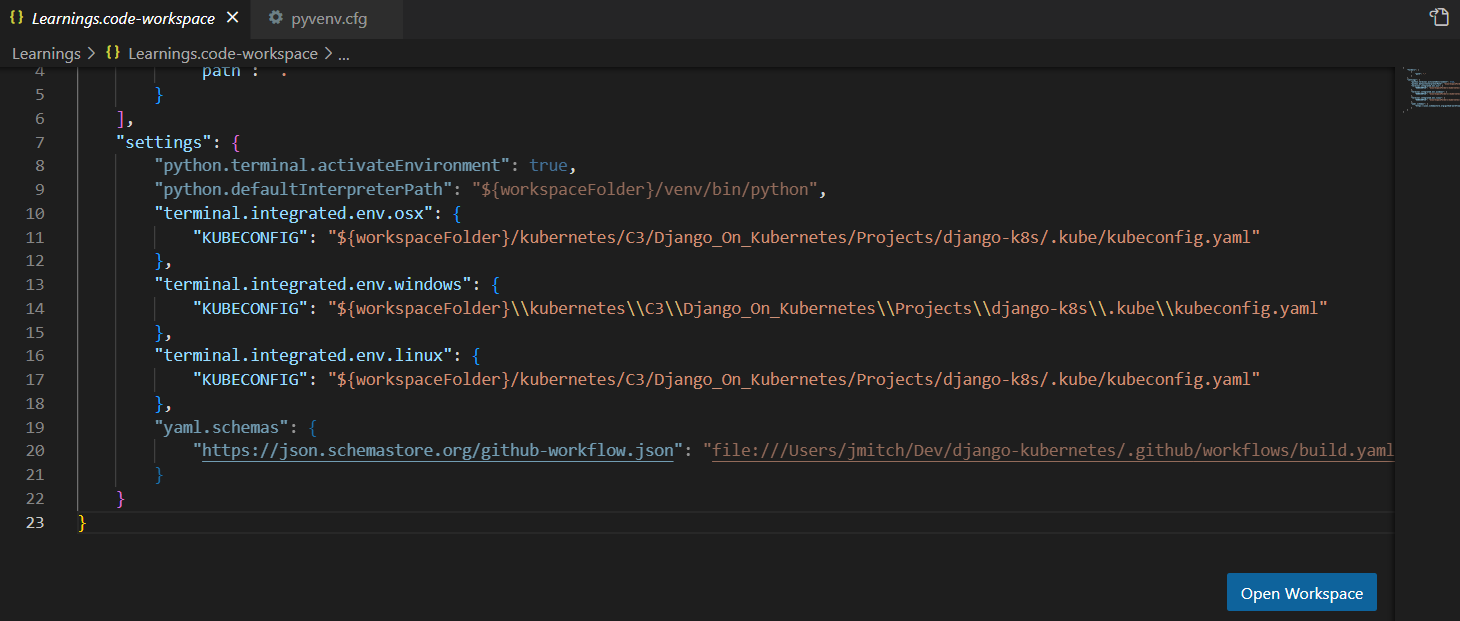

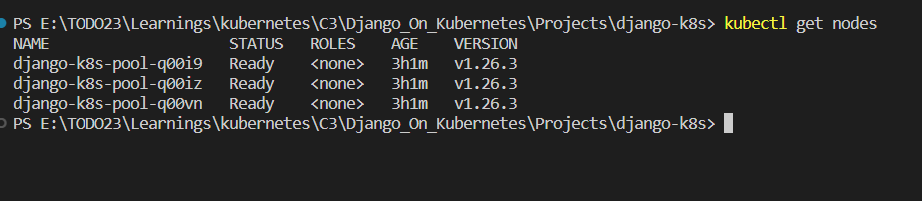

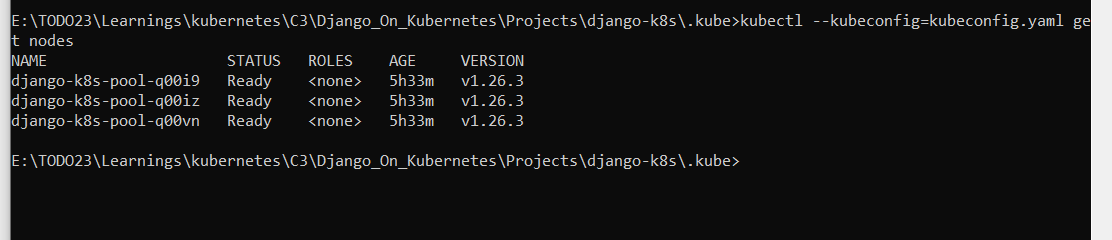

#### So basically it represents 3 Virtual machines of cluster created in Digital Ocean

### Deploy your First Container on Kubernetes

- Will First Deploy Nginx on Kubernetes

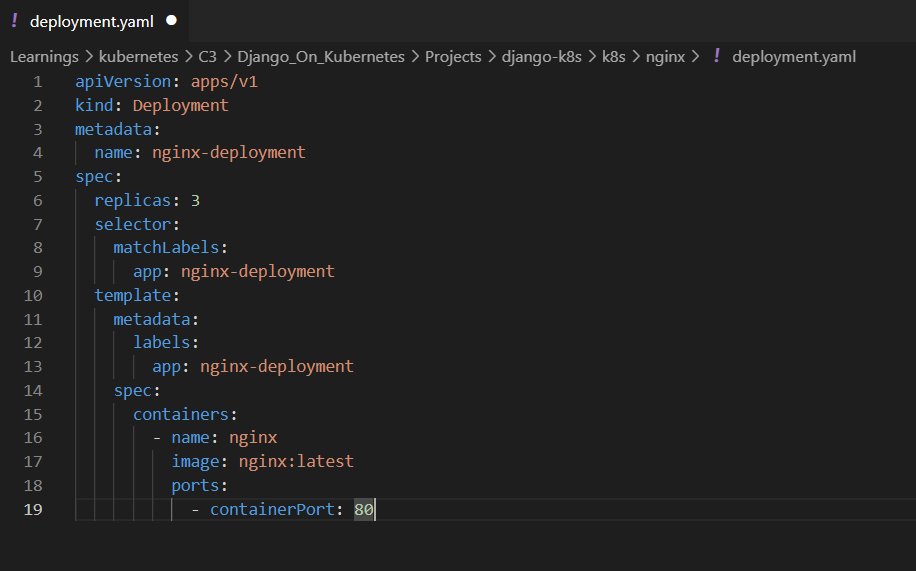

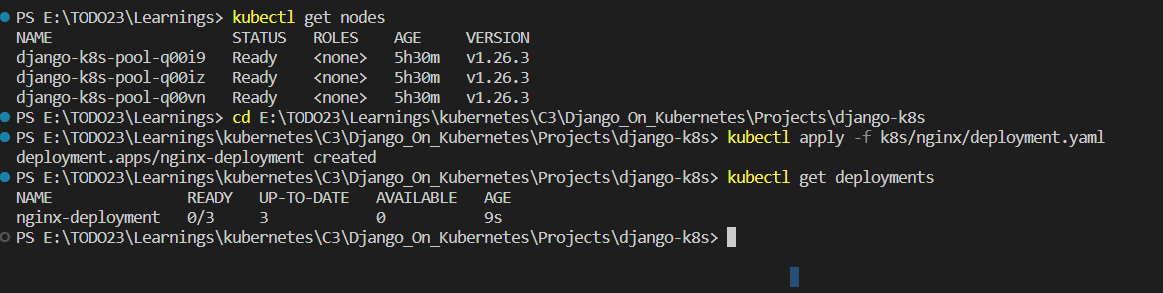

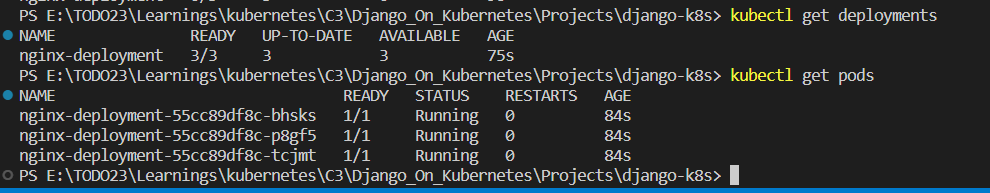

We have mentoned replicas = 3 , So each POD will get created in 3 different Nodes . PFB SS for your references

### POD1 - Node 1

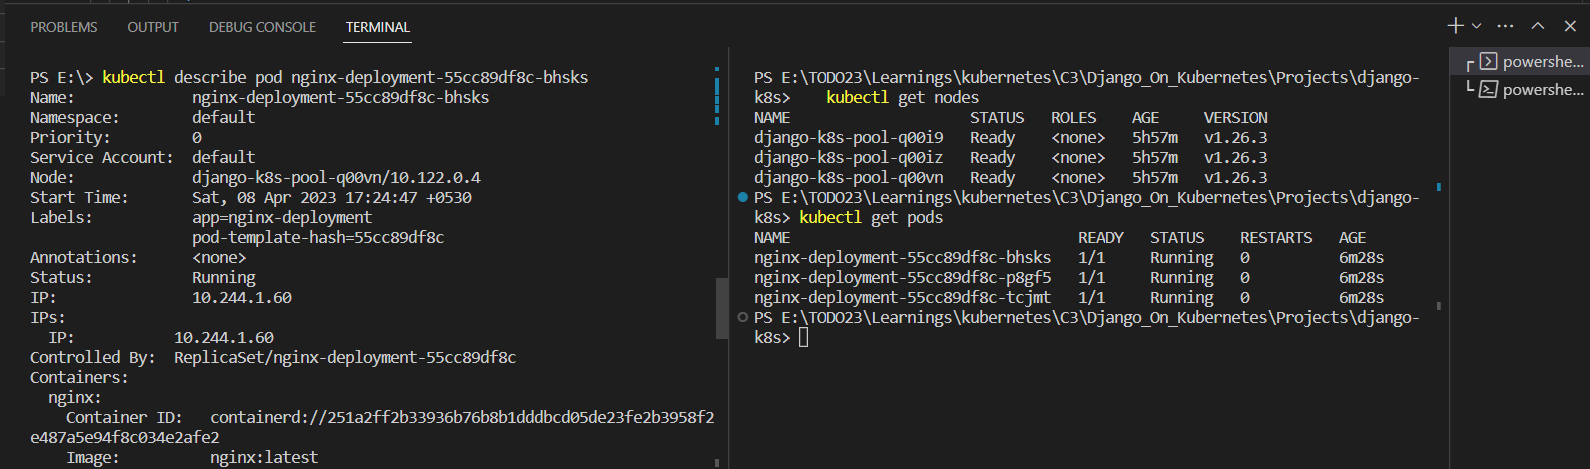

### POD2 - Node 2

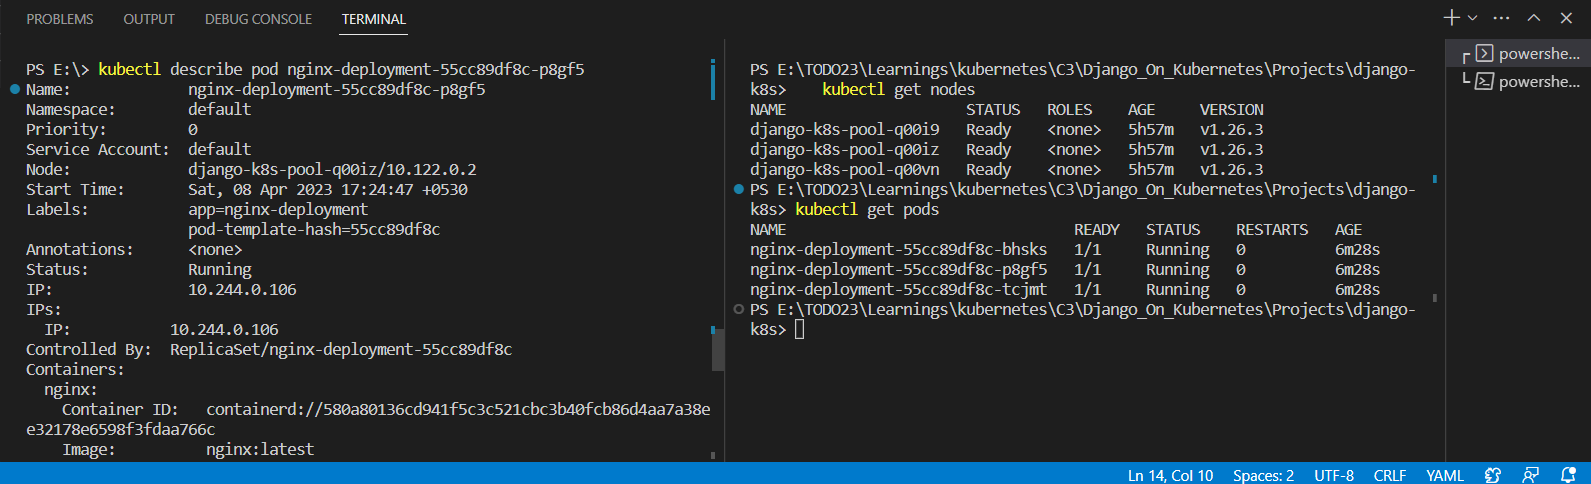

### POD3 - Node 3

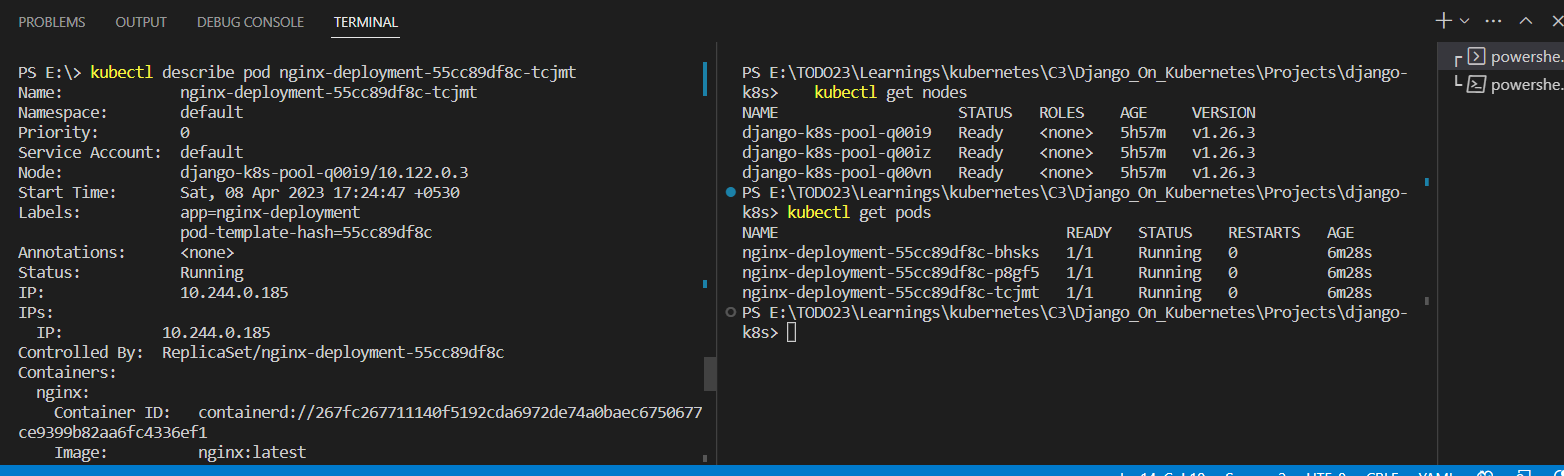

#### Now we will go inside one of the POD using exec command 

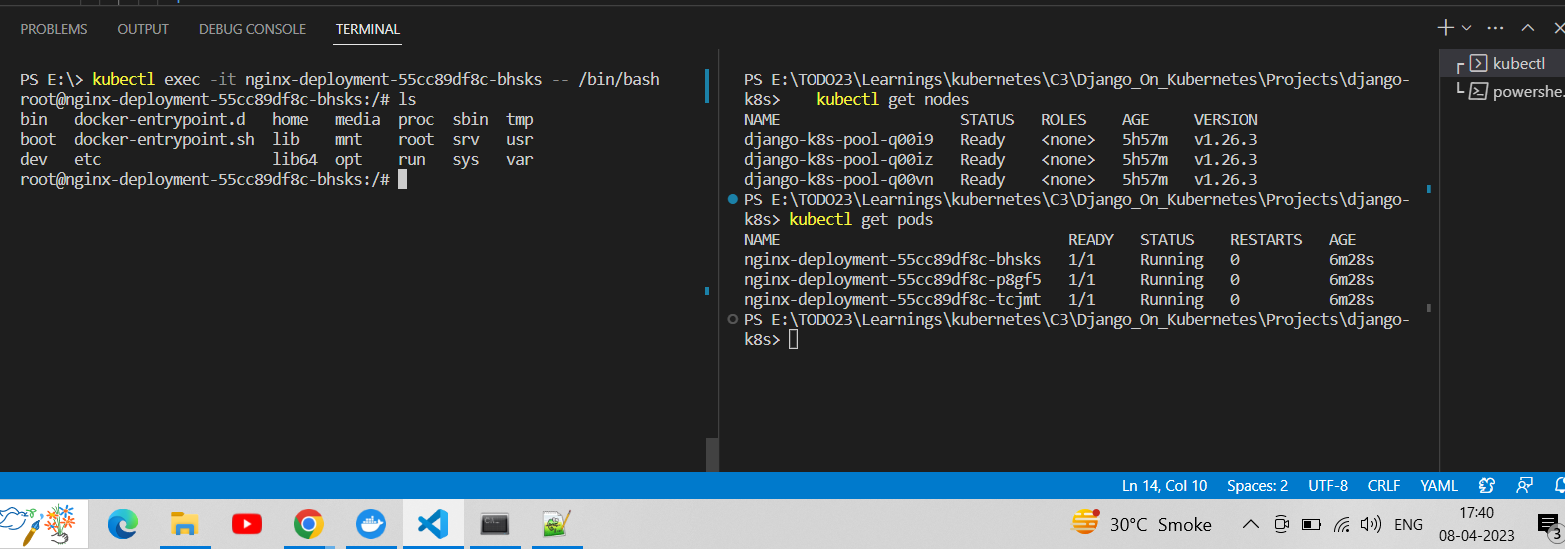

#### Now we will delete All deployment and pods using delete 

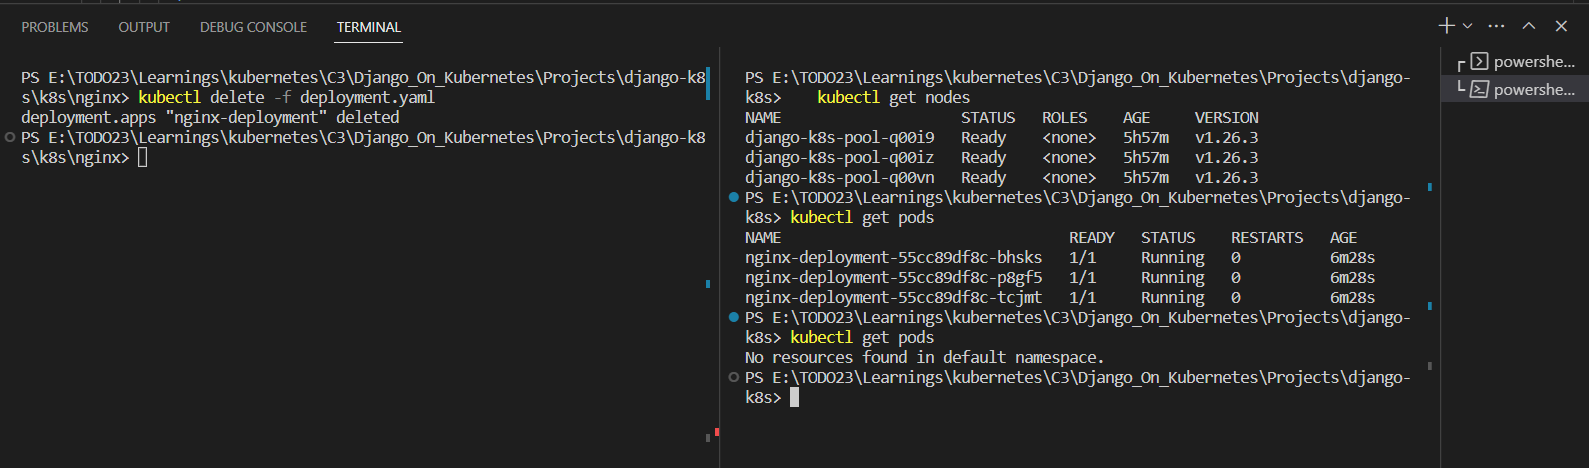

### Expose your Deployment with Load Balancer 

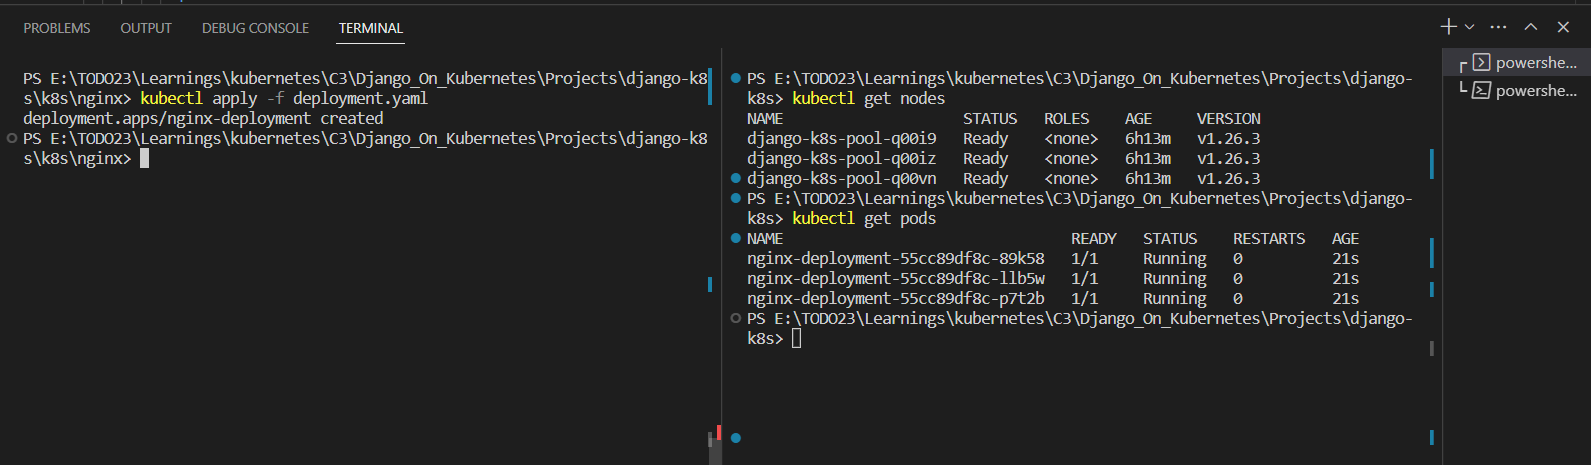

Now we will create a Service 

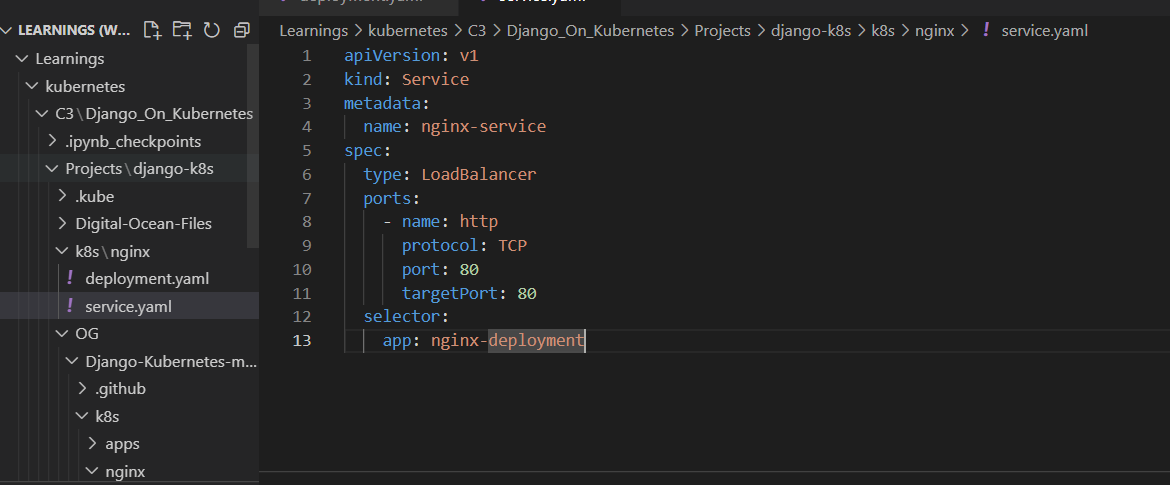

#### LoadBalancer 

LoadBalancer which is used over here will be LoadBalancer of DigitalOcean which will distribute the traffic across our 3 replicas of our deployment which we created earlier

TargetPort : 80 is port no of nginx-deployment 

i-e Service is geting connected to deployment with port 80 . Because in Deployment.yaml we have written container port as 80

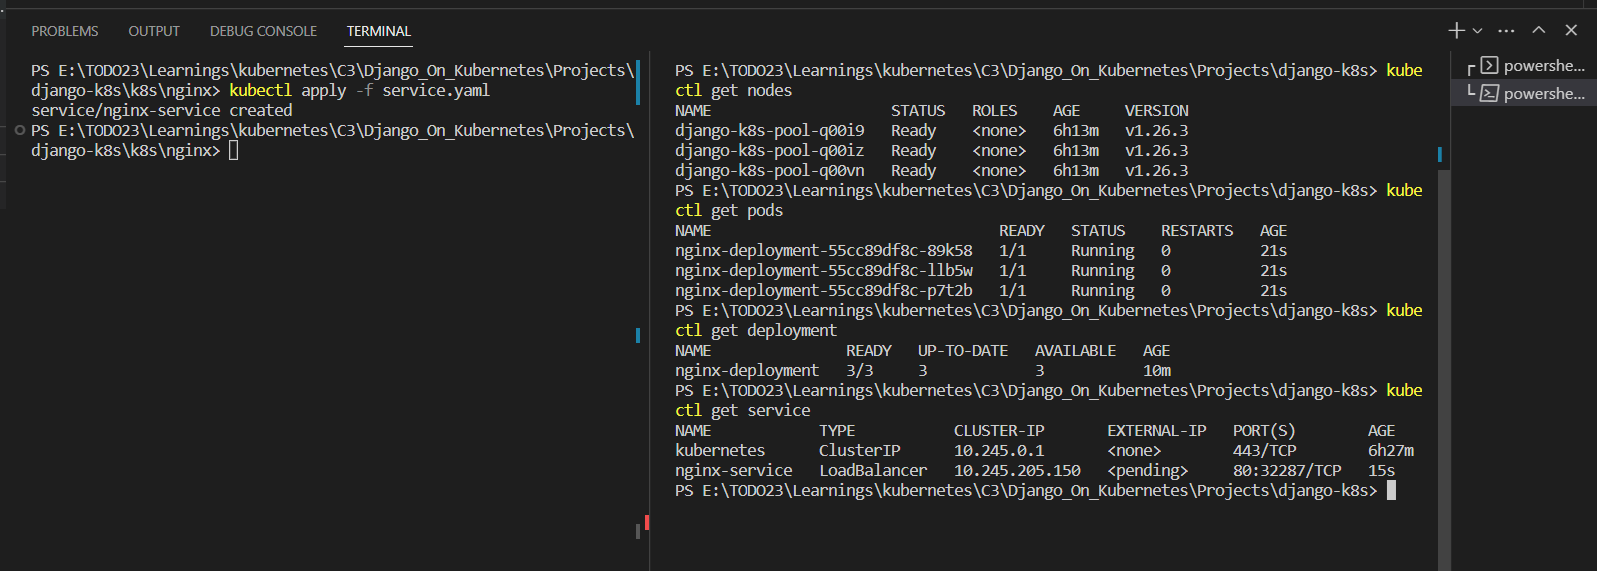

Load Balancer can also be seen on Kubernetes Cluster of Digital ocean 

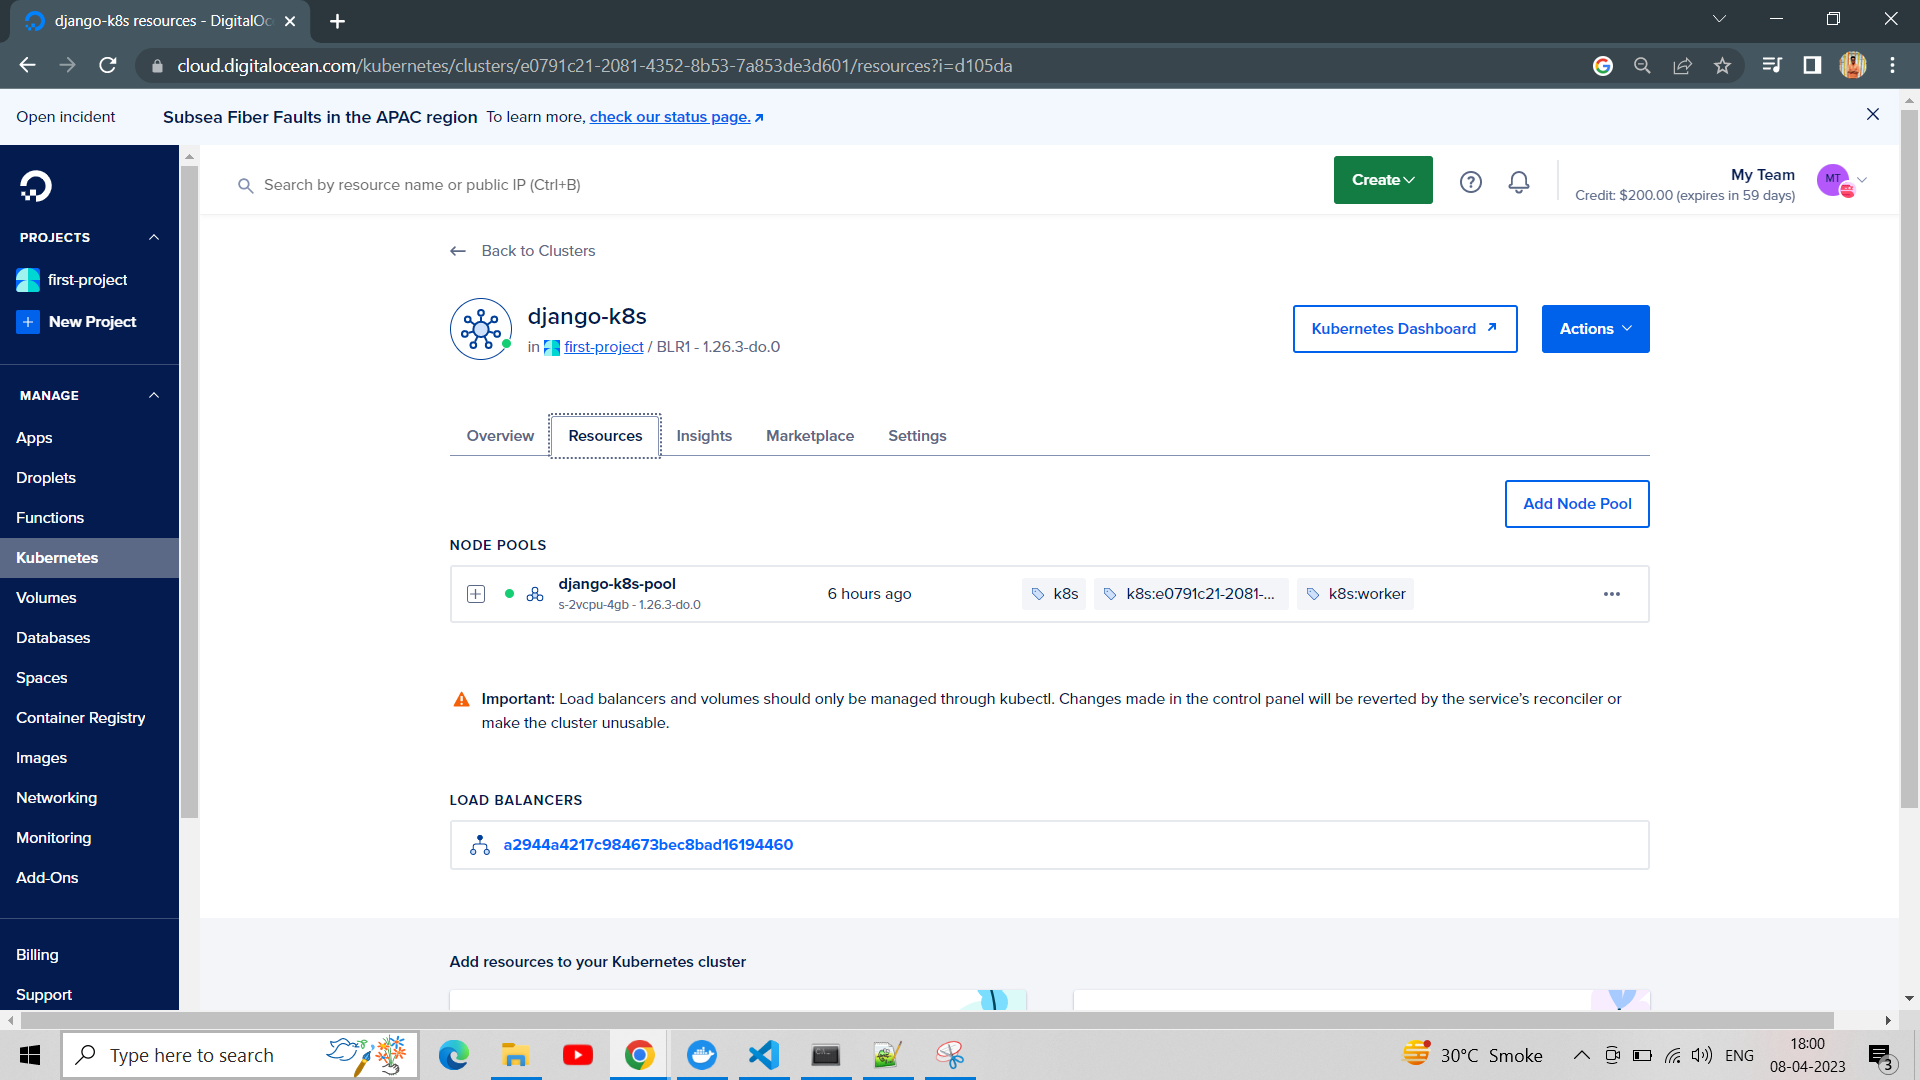

Click on that Load Balancer 

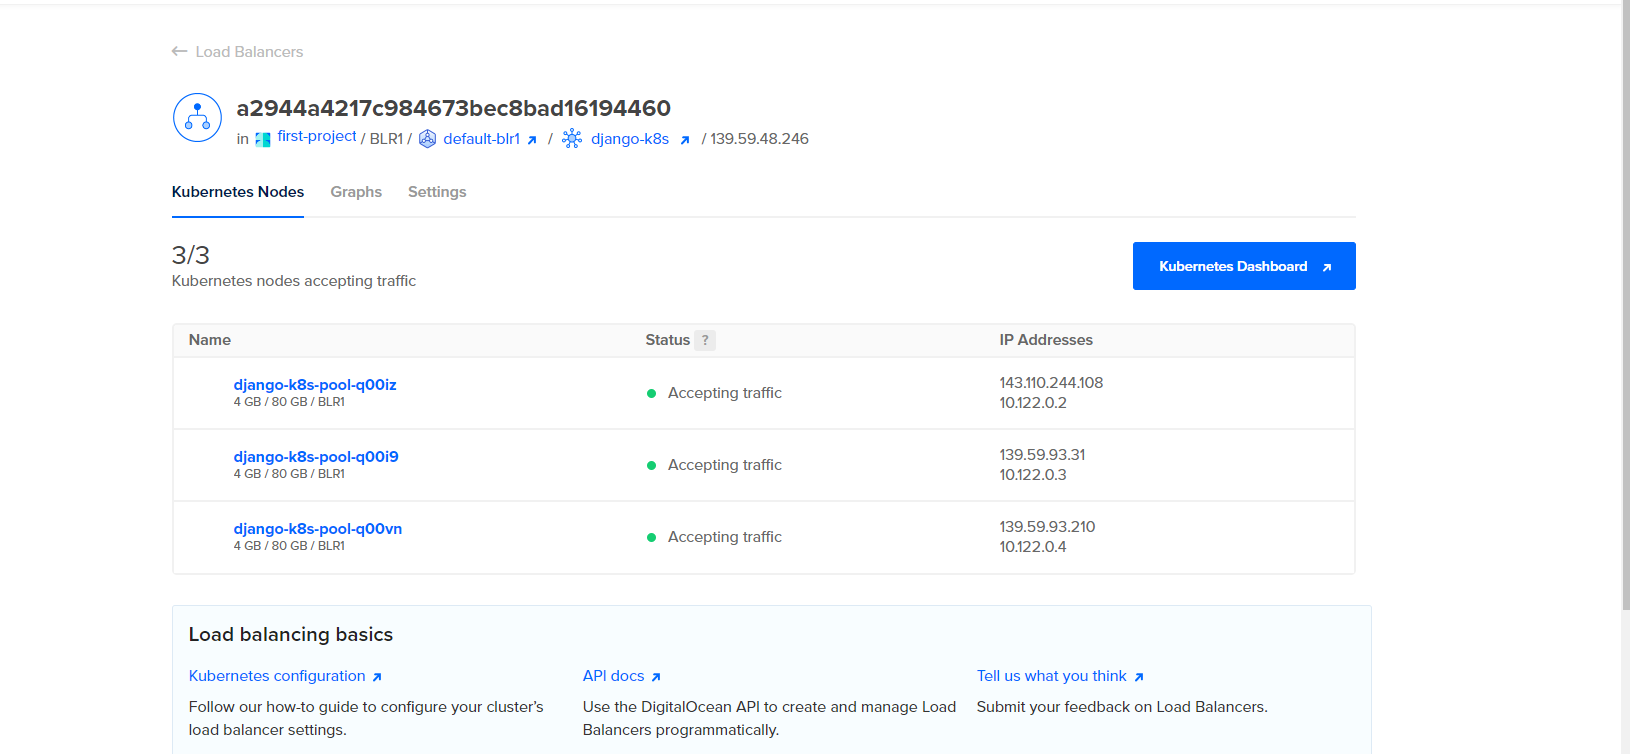

#### Retrieve YAML Files if it got deleted accidently

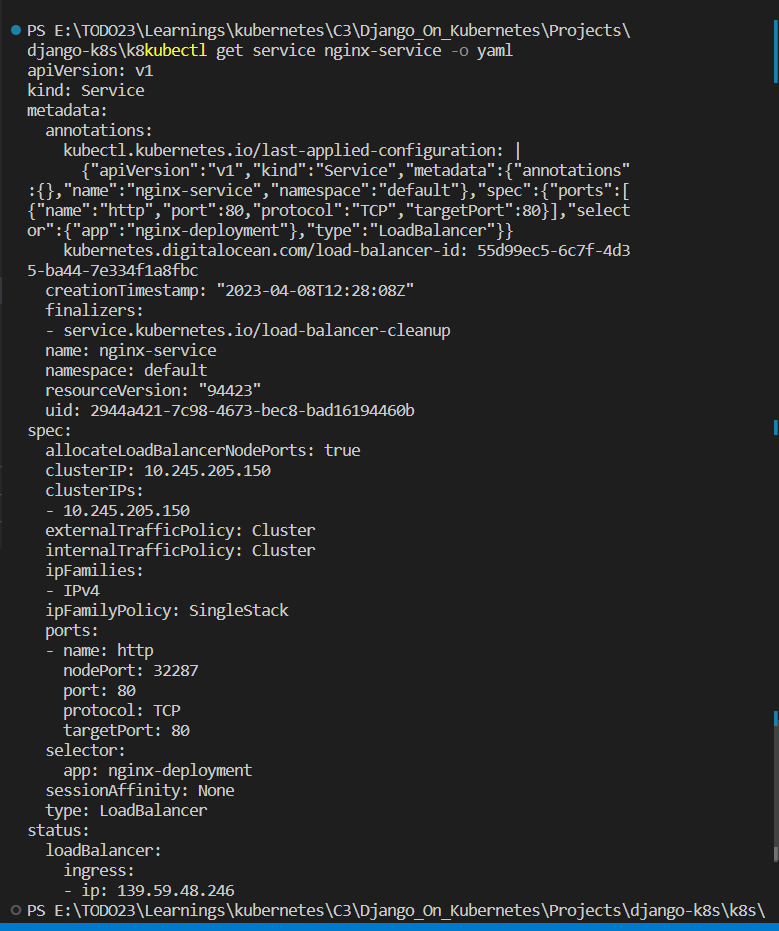

In above Image , Ingress can be seen with IP - 139.59.48.246 

It is the same IP which will be seen in External IP when you write kubectl get service

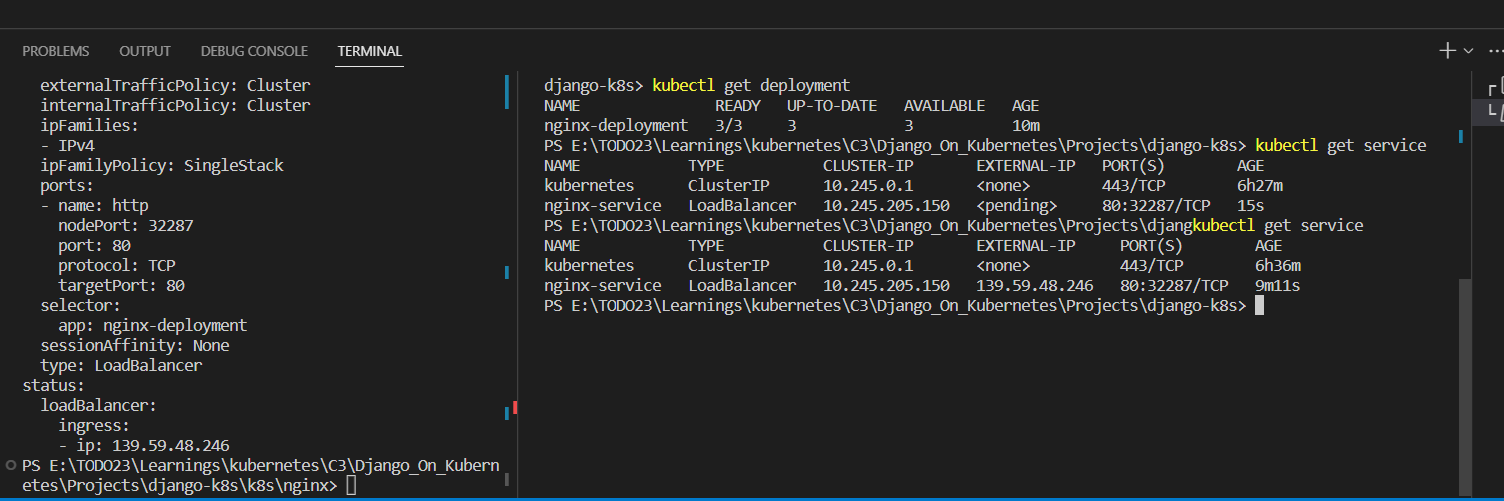

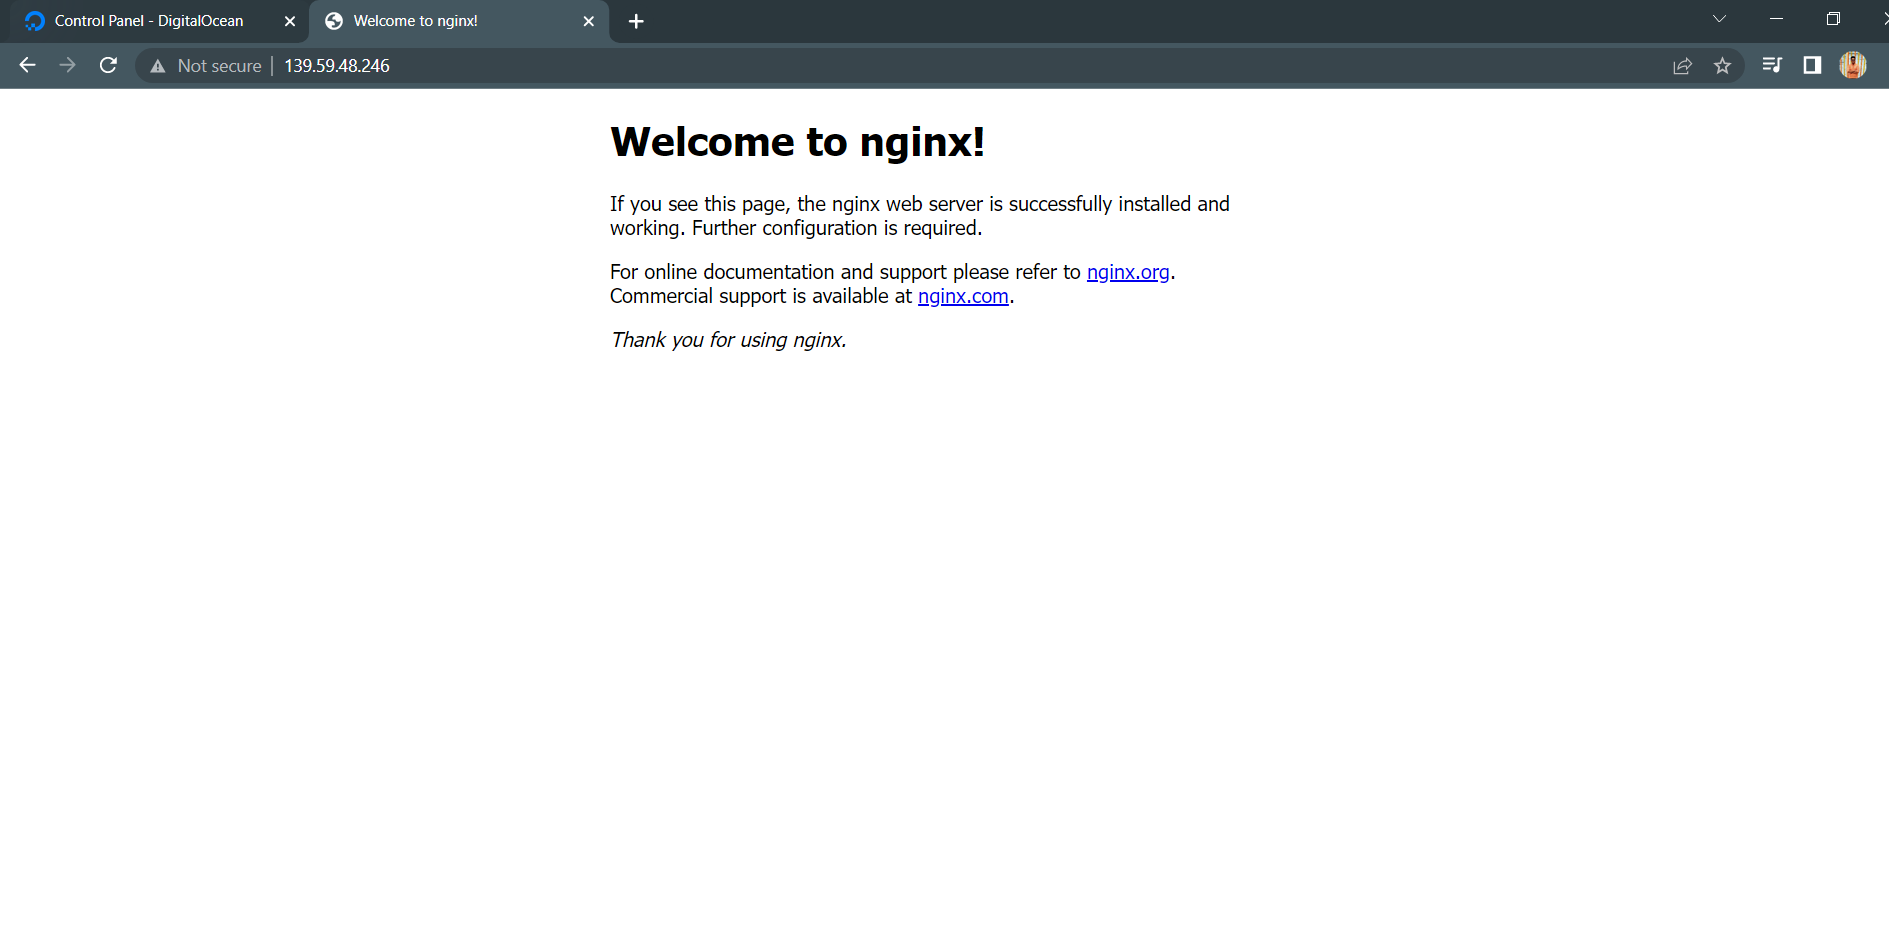

You can also combine both Deployment and Service in One YAML File 

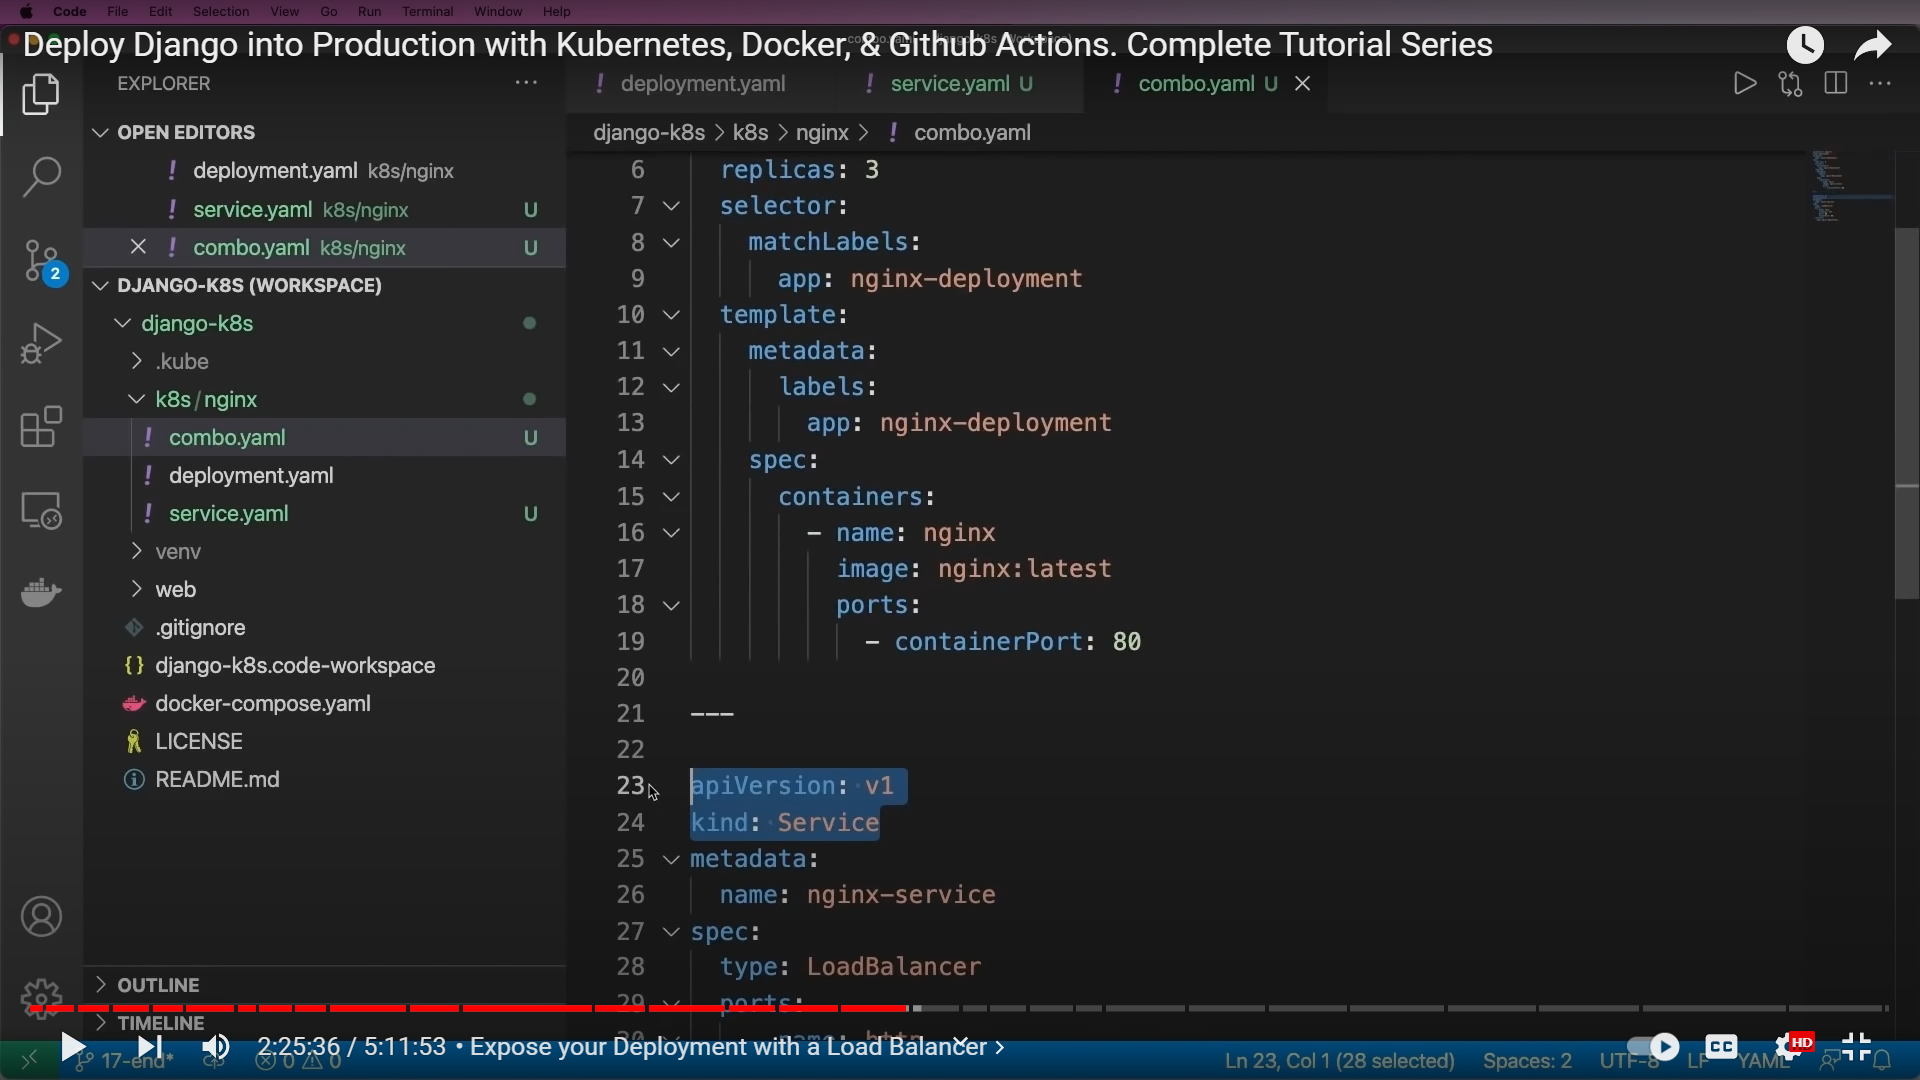

#### Delete Deployment and Service of NGINX

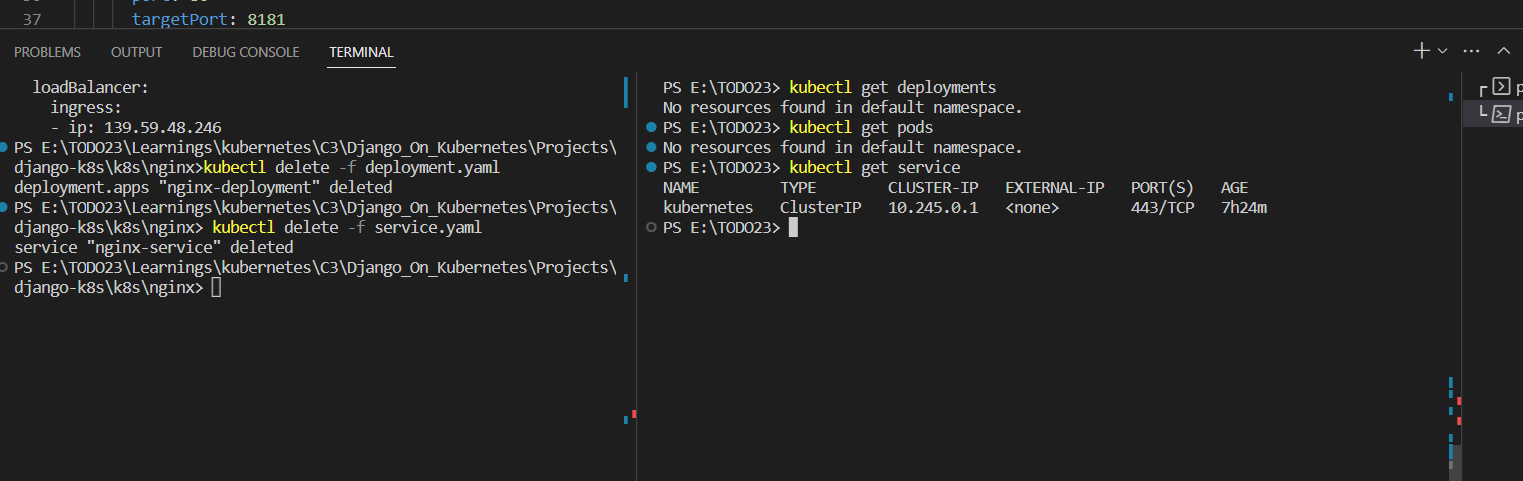

### Deploy a Minimal FastAPI APP

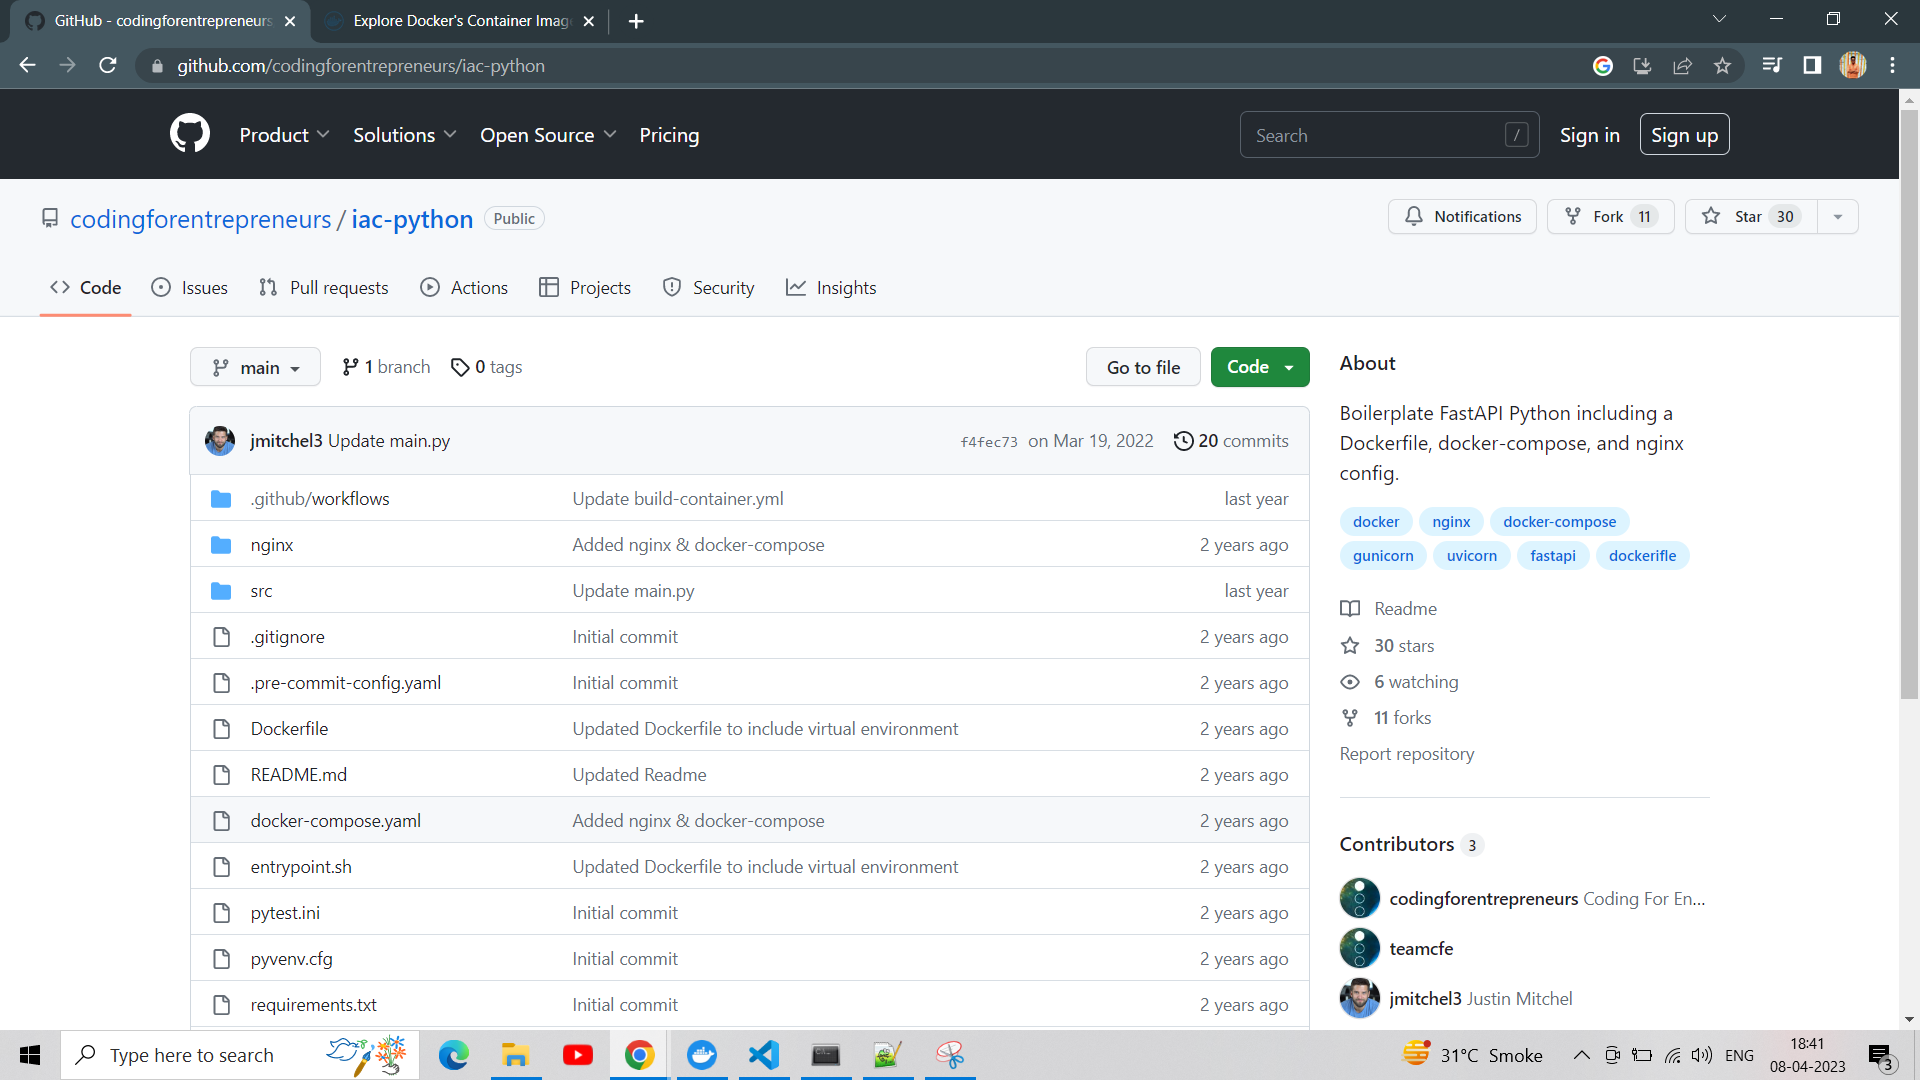

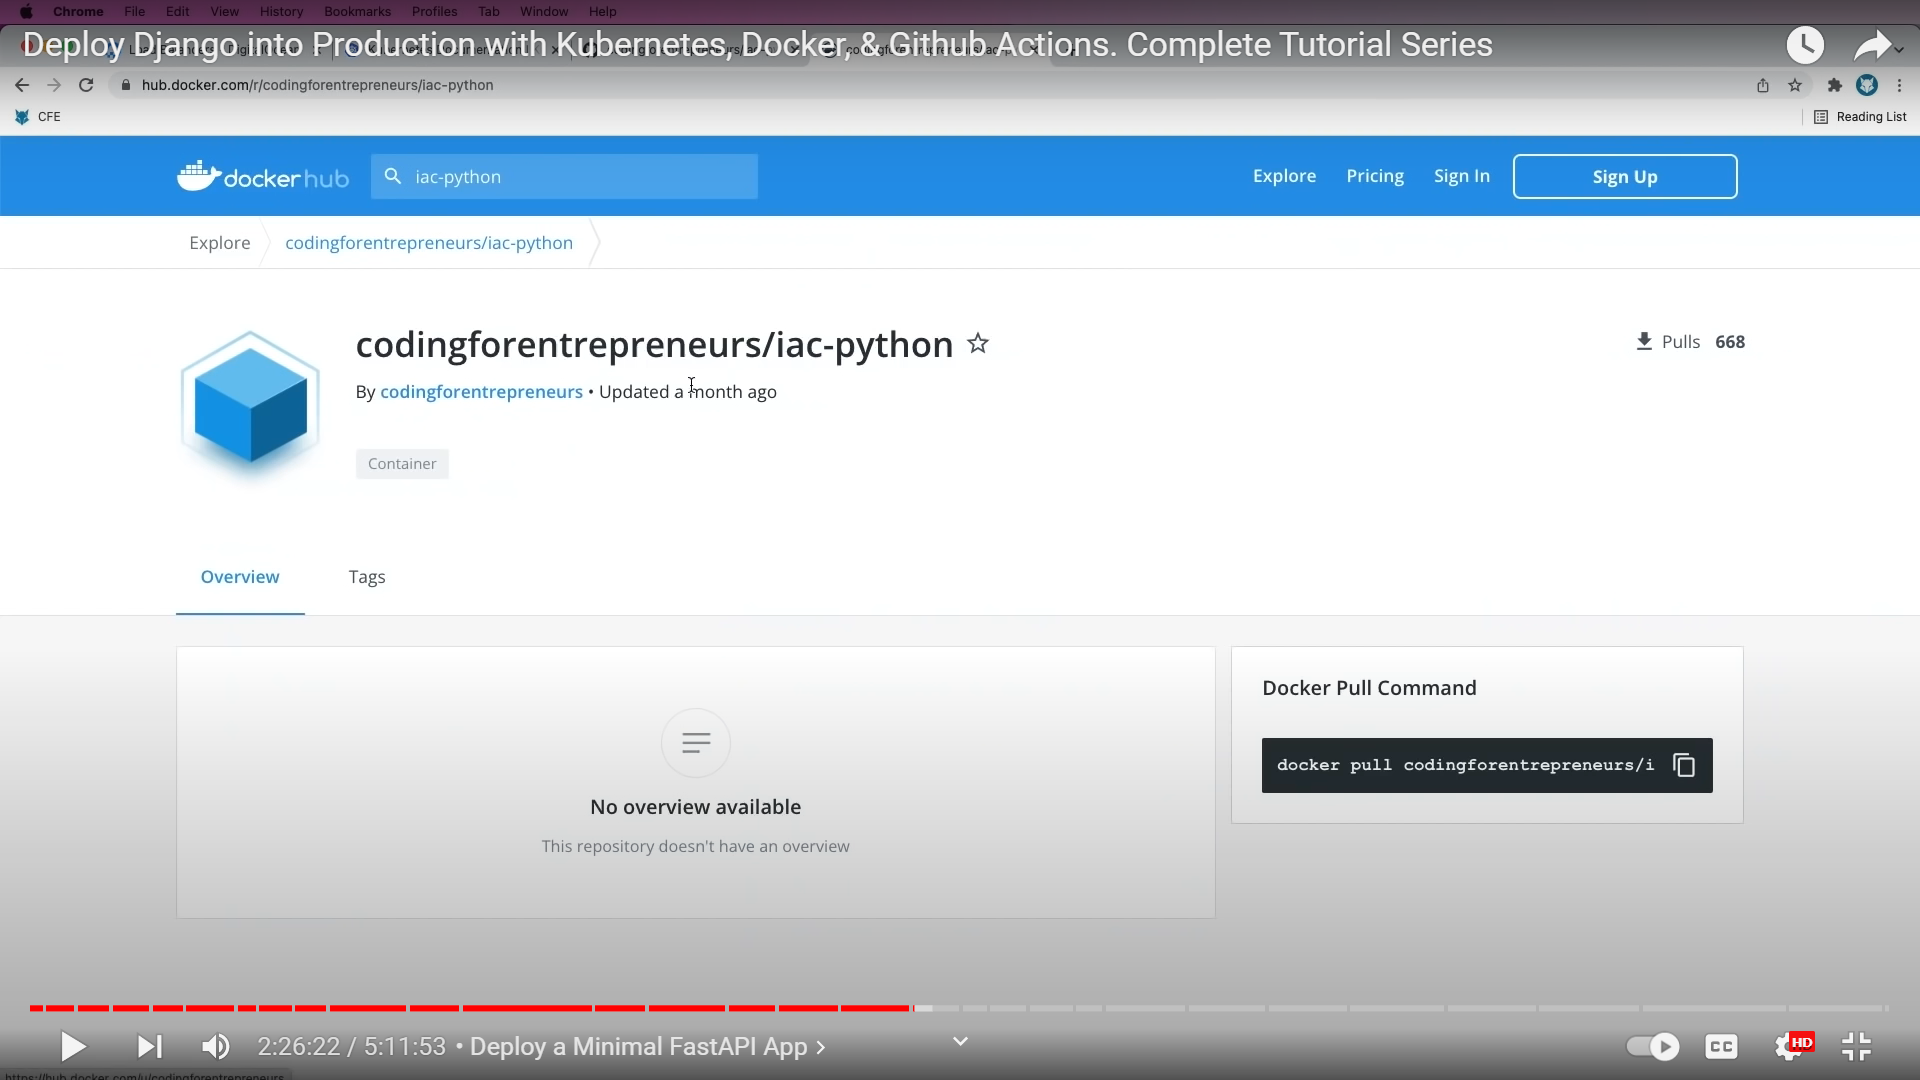

##### Now we will create apps folder in k8s which includes iac-python.yaml .

- https://github.com/codingforentrepreneurs/iac-python

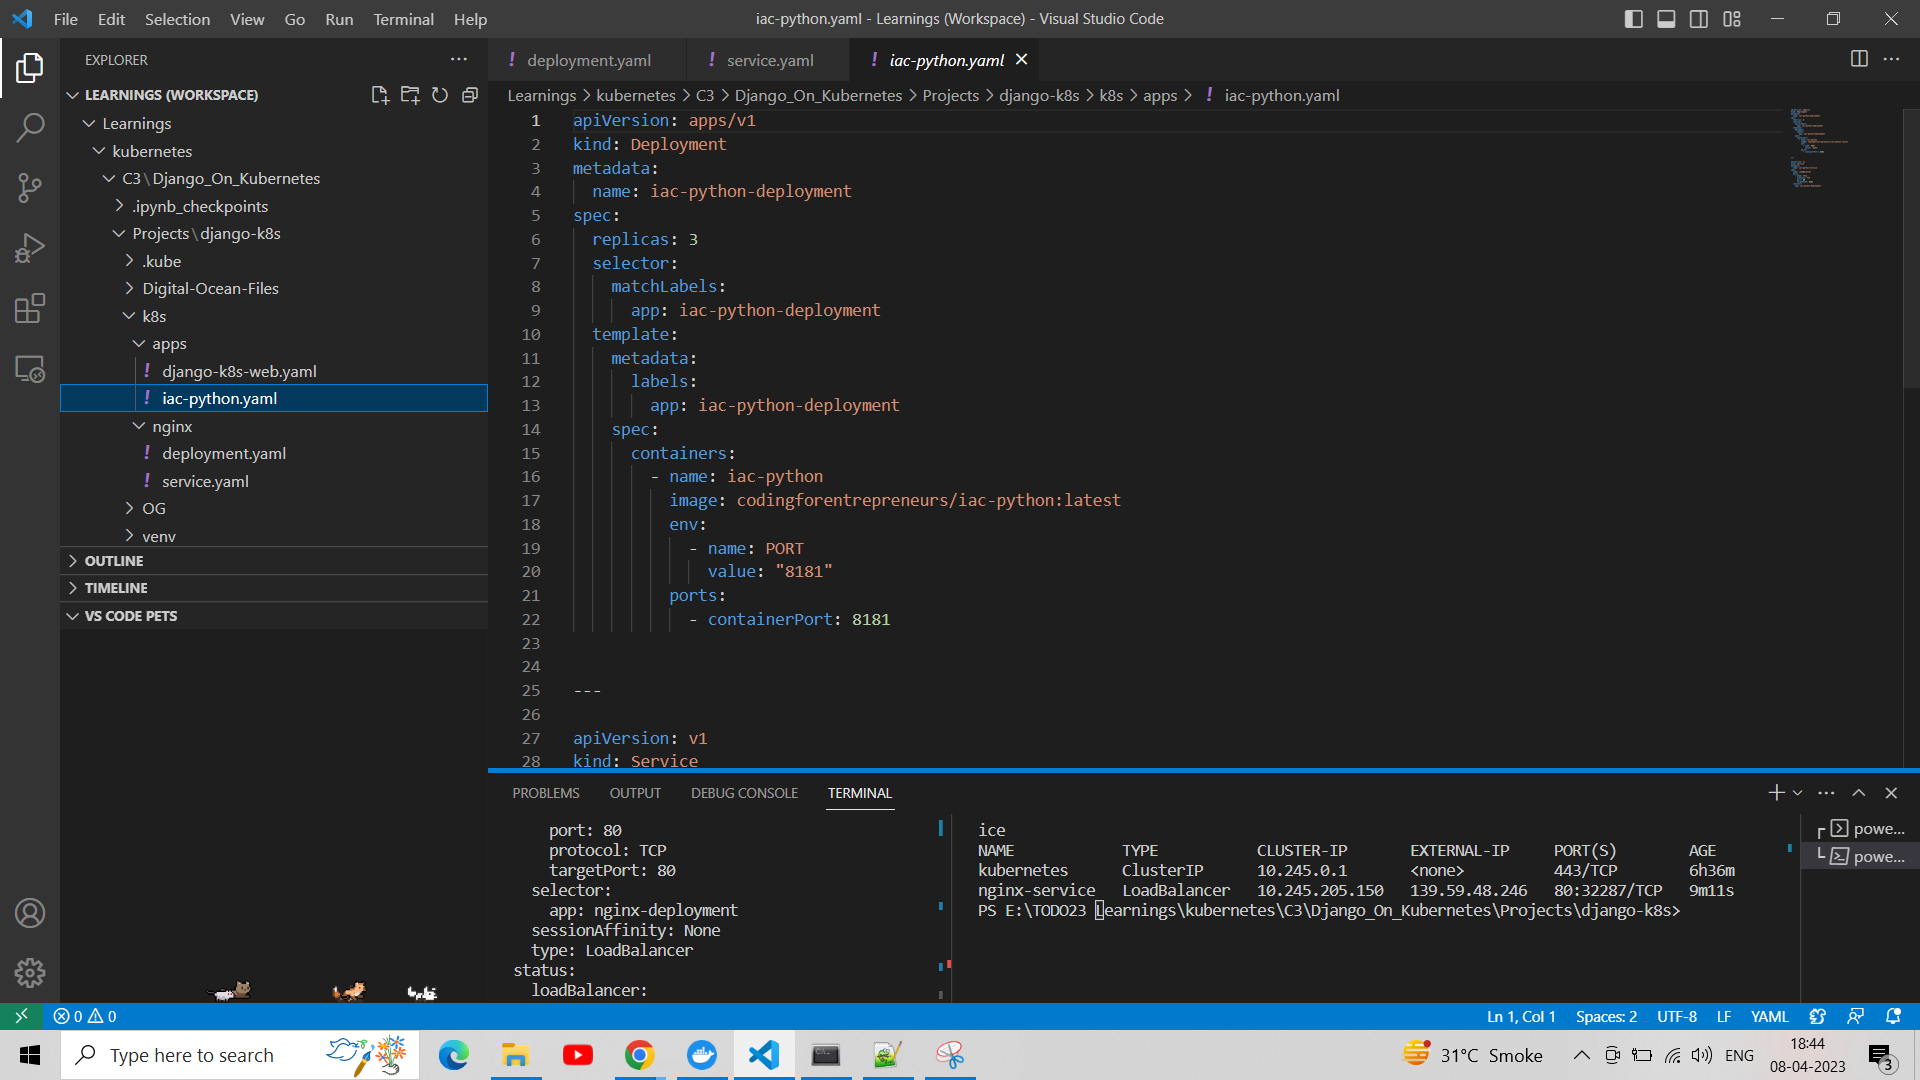

Image codingforentrepreneurs/iac-python:latestis publicly available in docker hub

https://hub.docker.com/r/codingforentrepreneurs/iac-python

Also we have defined container port as 8181

This containerPort will get connected in service targetPort 8181

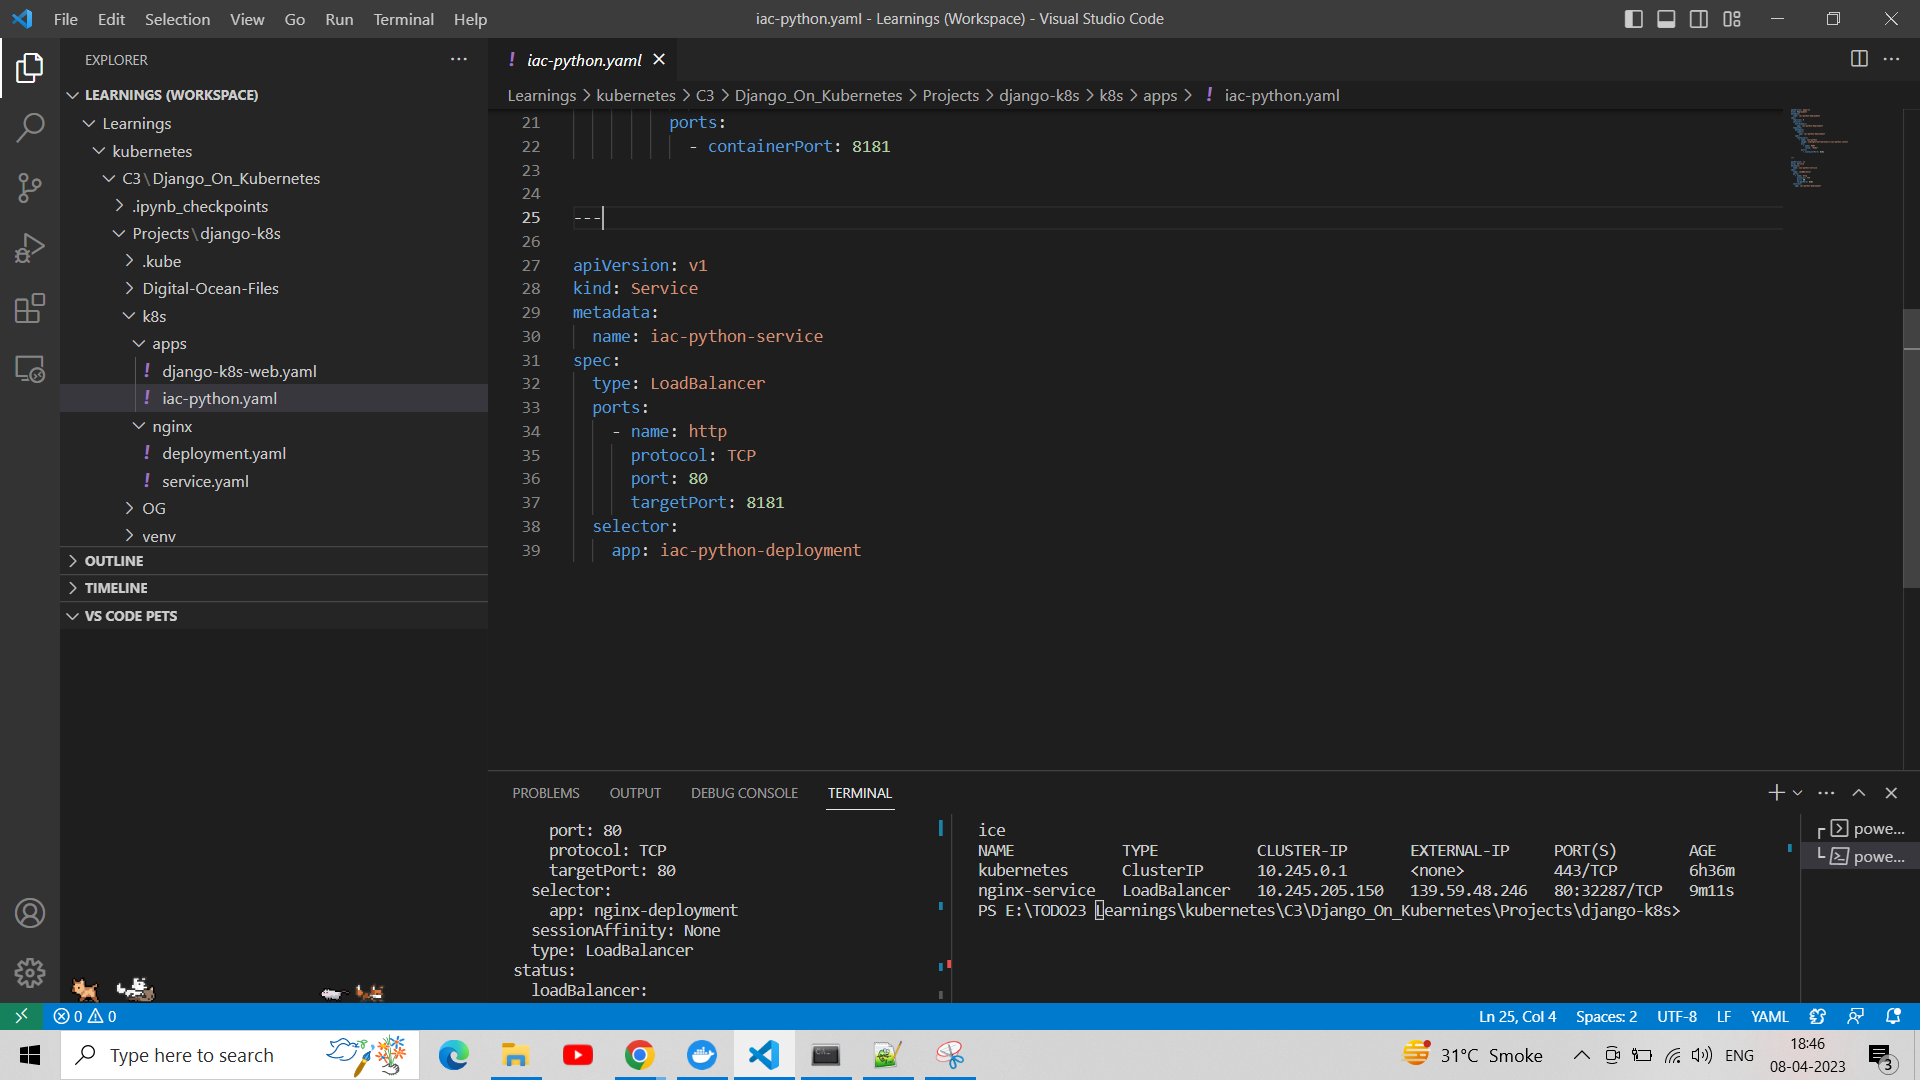

#### Creating Depployment and Service in nodes

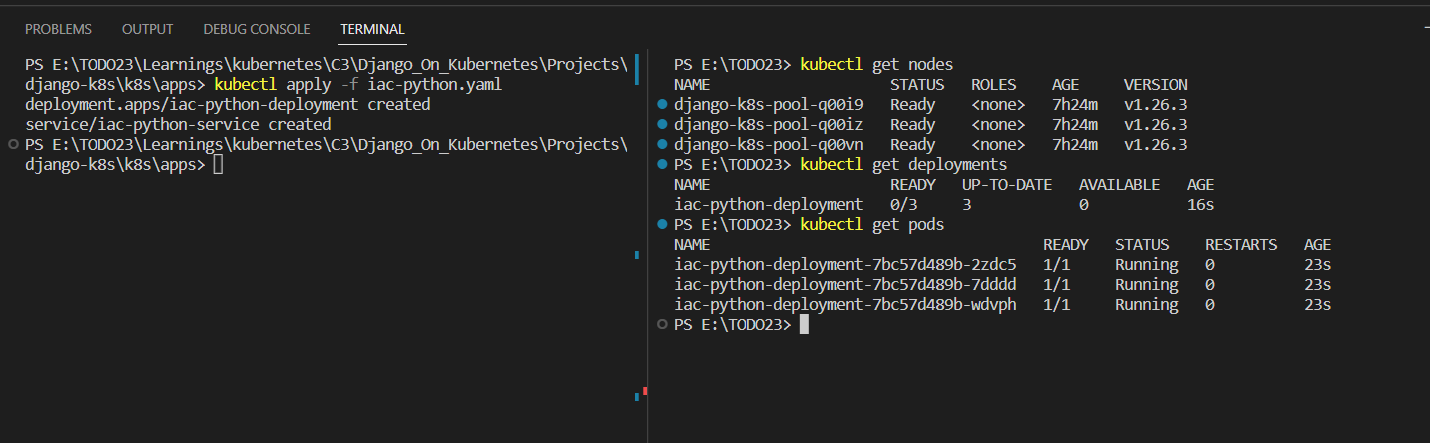

Each POD will get created in 3 different nodes 

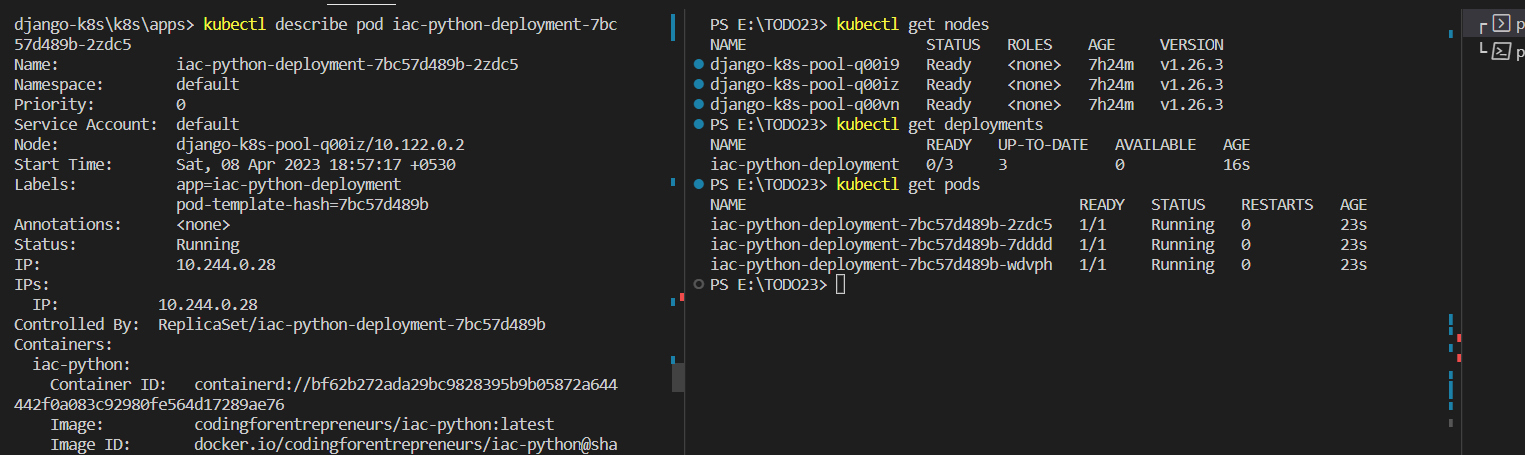

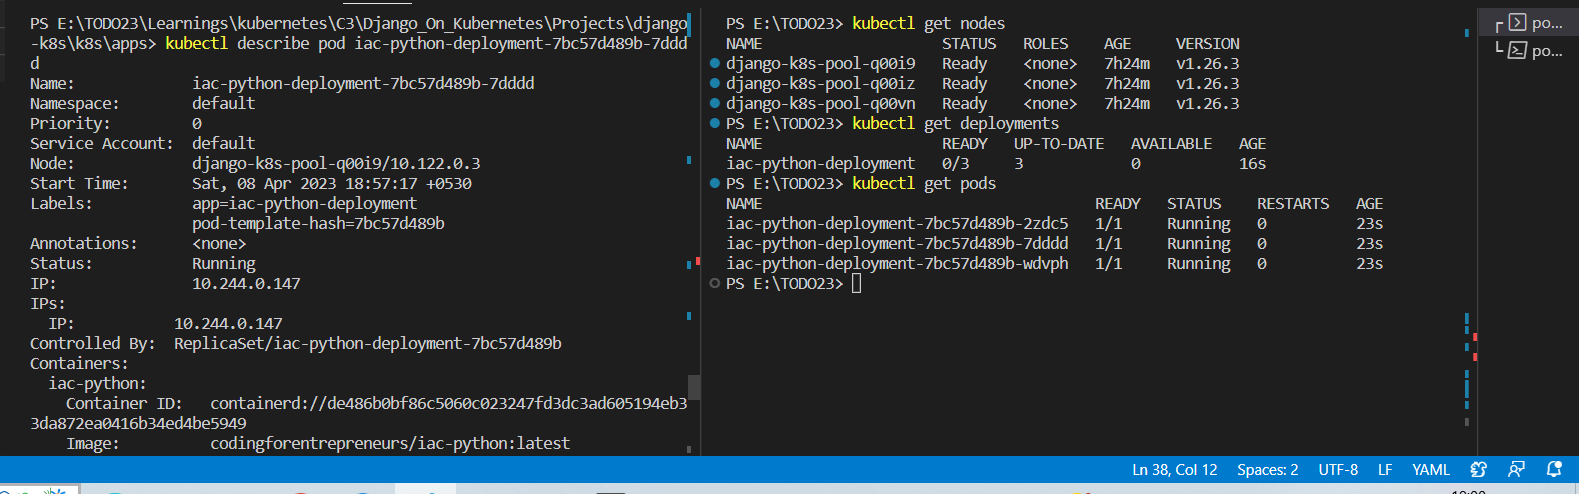

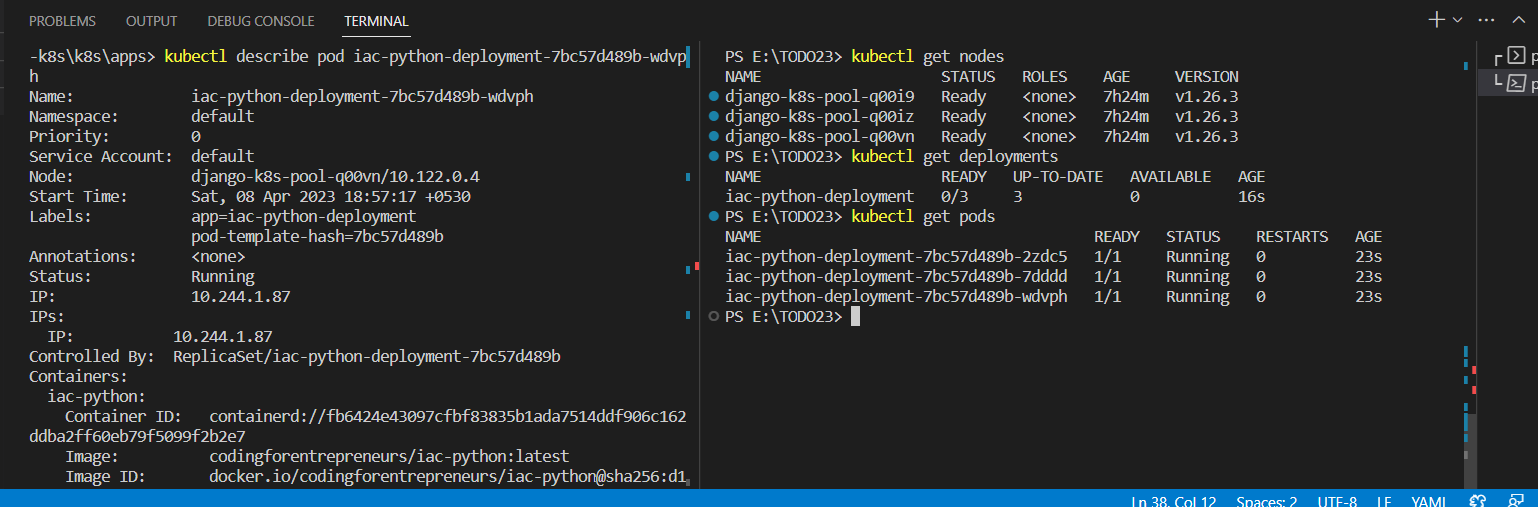

#### Will go inside one of the pod and check whether requirements.txt of iac-python was installed correctly or not 

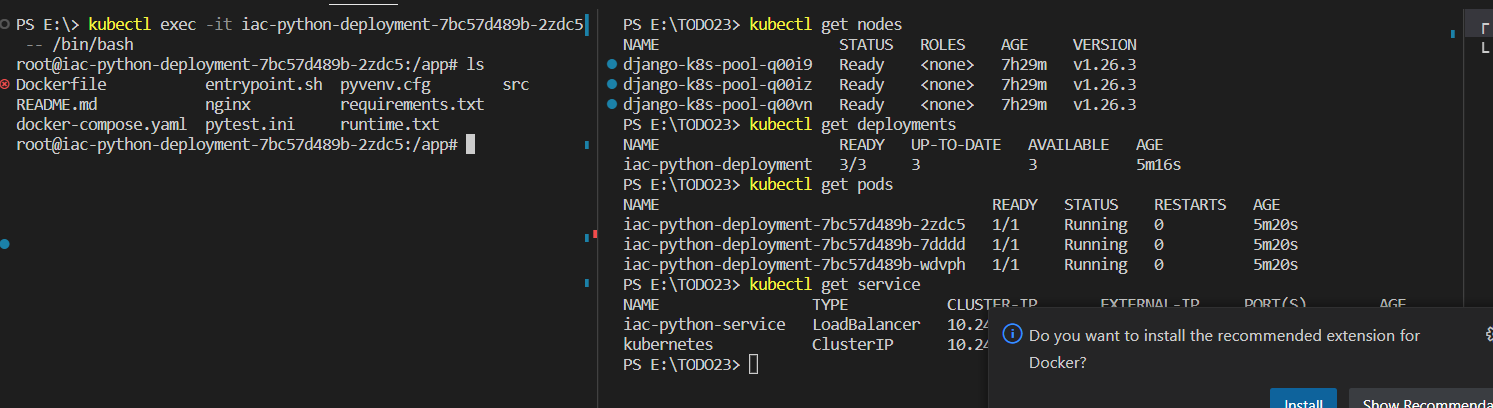

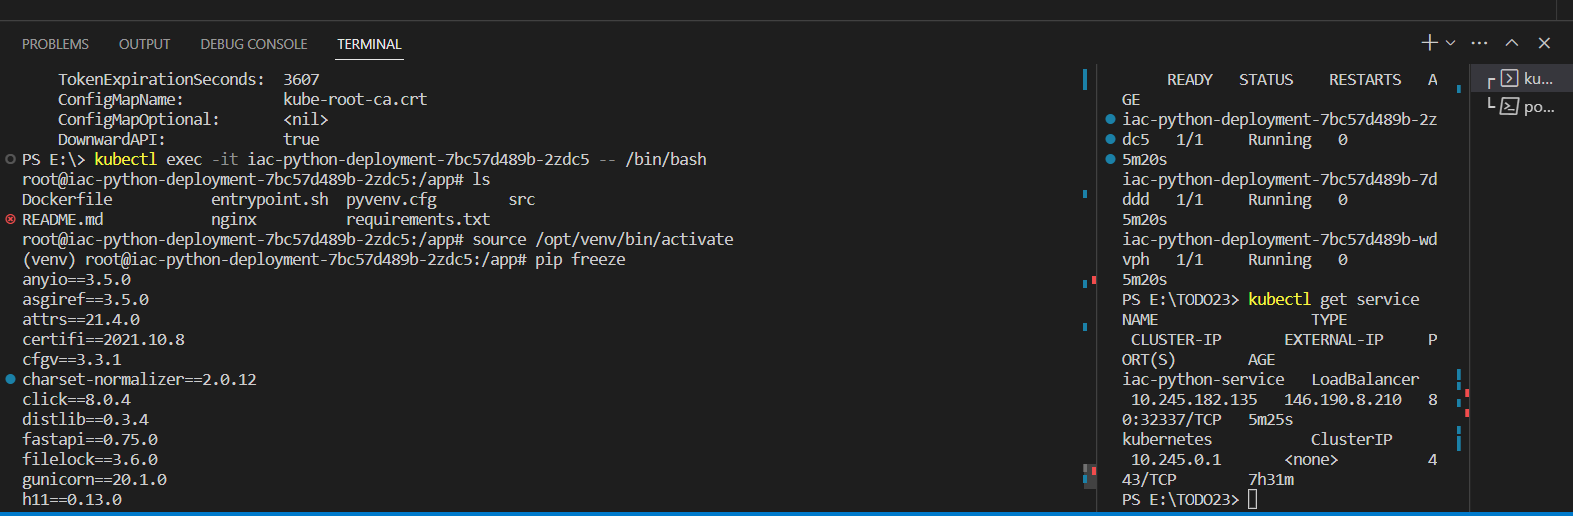

IAC-Python will work on External IP 

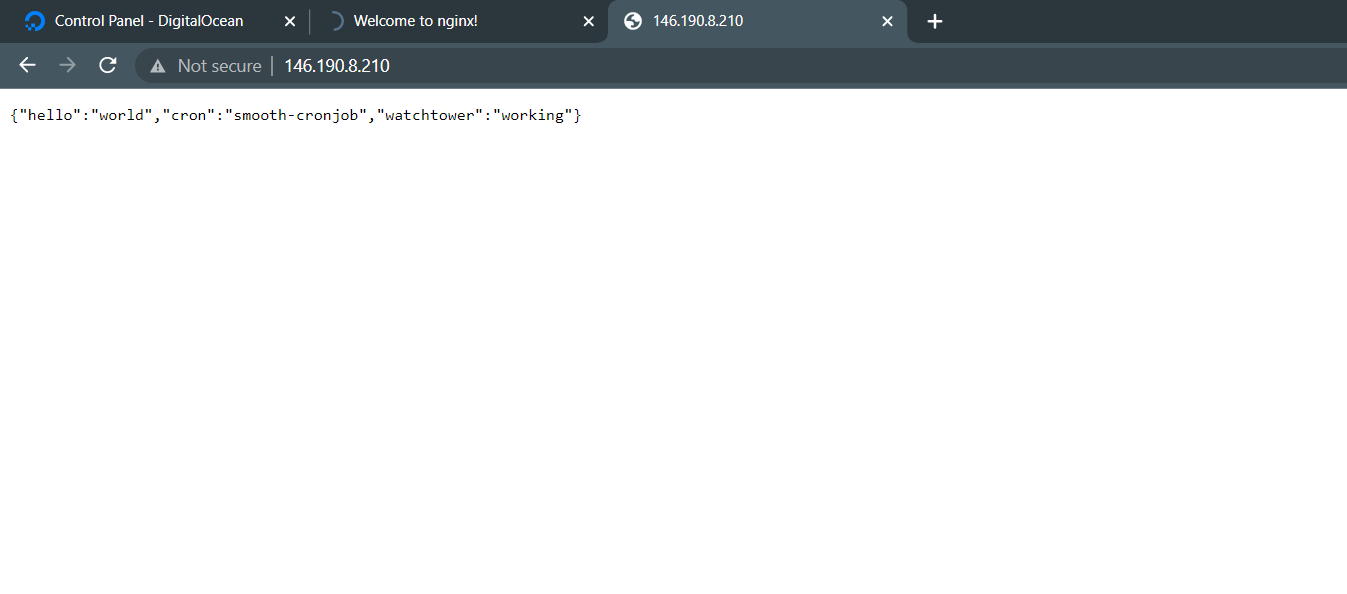

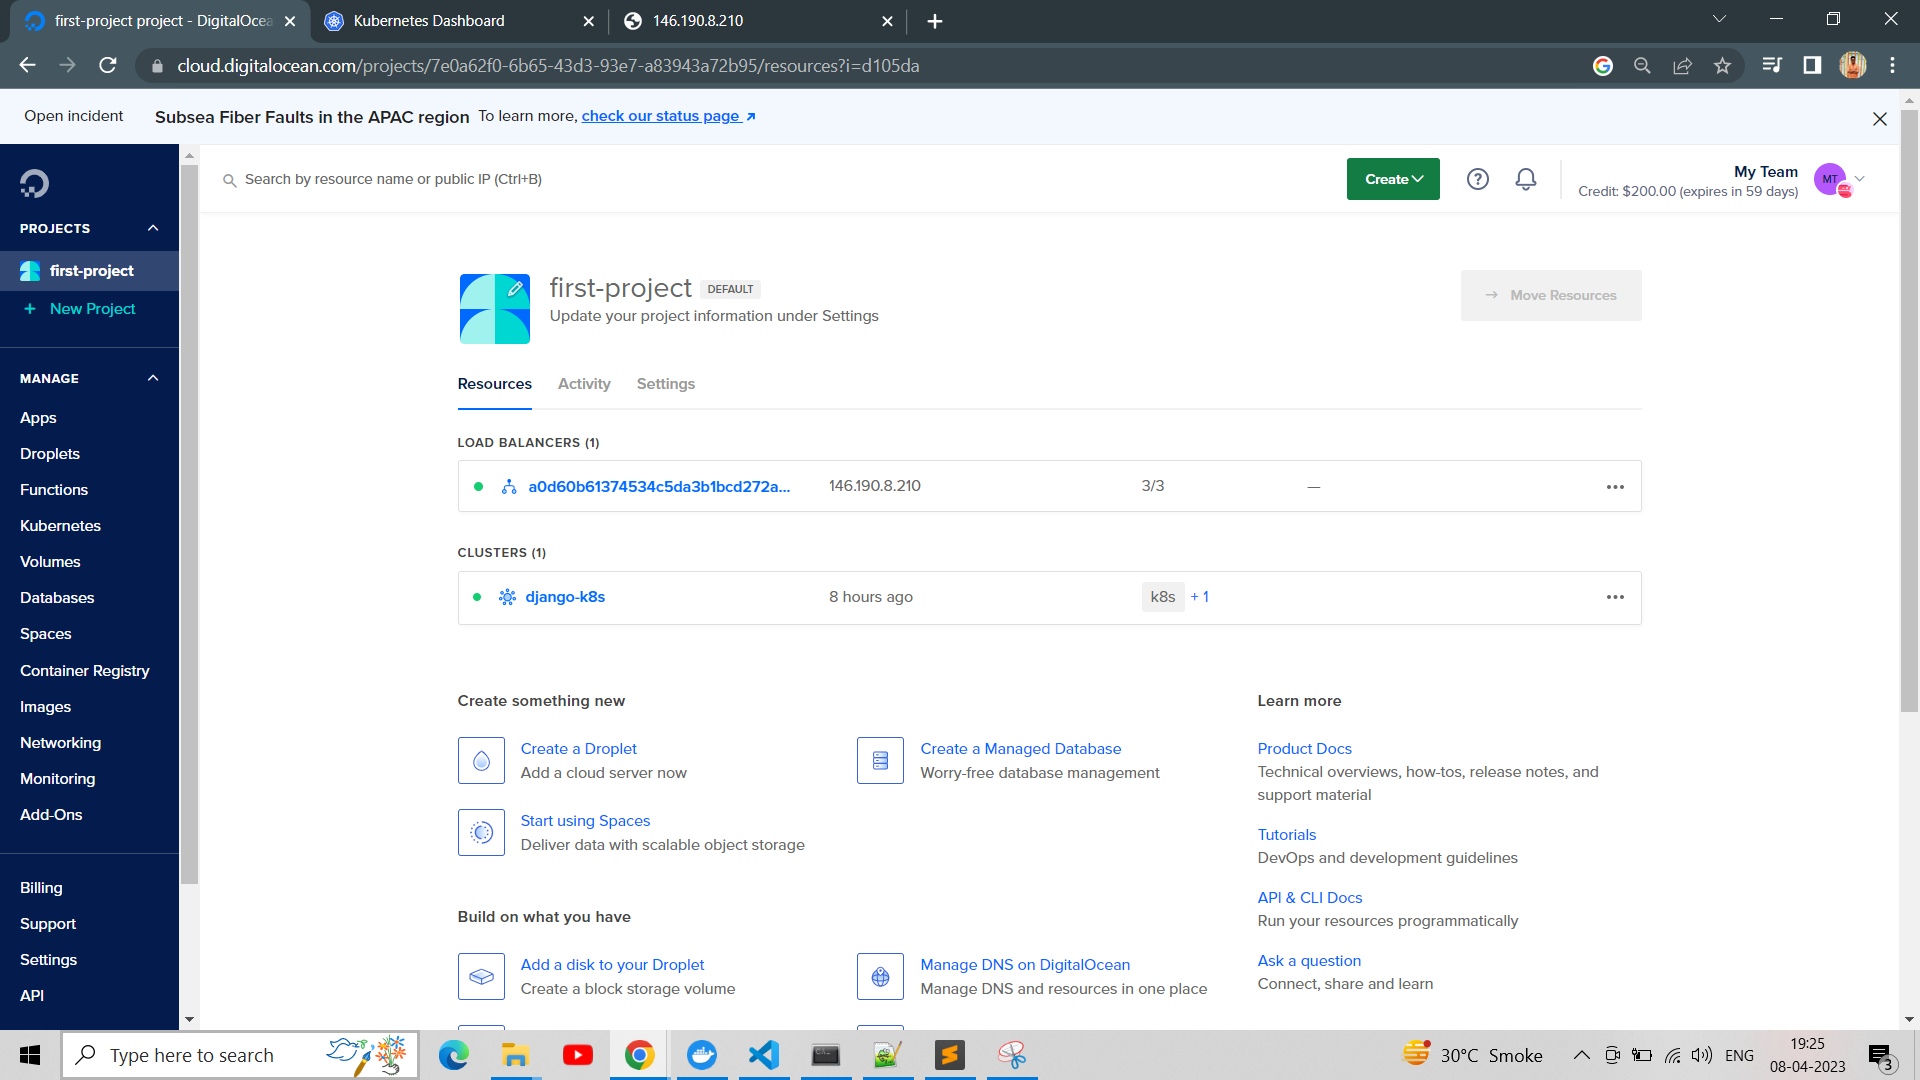

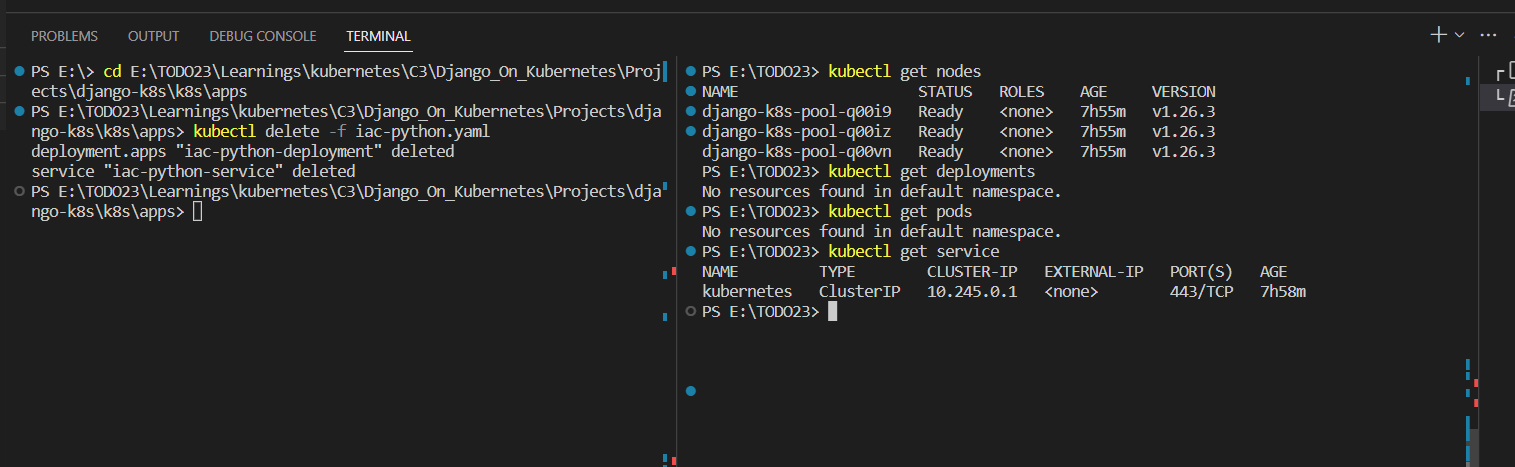